# Exploratory Data Analysis

According to the American Heart Association,

**Trans fat, Saturated fats** 

- Trans fat intake should be less than 2g/day and no more than 13g of saturated fat.

**Sugar**
- no more than 36g of sugar for men and 24g of sugar for women.

**Sodium**
- no more than 2,300mg of sodium per day

**Protein**
- 0.83g/day per kilogram body weight

**Dietary Fibre**
- More than 25 grams of Dietary fibre every day provides great health benefits



According to University of California San Francisco,

**Cholesterol**
- If you have risk factors for heart disease, no more than 200 milligrams of cholesterol a day.
- If you do not have risk factors for heart disease, no more than 300 milligrams of cholesterol a day.

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() # set the default Seaborn style for graphics

In [2]:
merged_data = pd.read_csv('datasets/2_merged_data.csv')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item               389 non-null    object 
 1   Category           389 non-null    object 
 2   Serving Size (g)   389 non-null    float64
 3   Calories           389 non-null    int64  
 4   Total Fat (g)      389 non-null    float64
 5   Saturated Fat (g)  389 non-null    float64
 6   Trans Fat (g)      389 non-null    float64
 7   Cholesterol (mg)   389 non-null    int64  
 8   Sodium (mg)        389 non-null    int64  
 9   Carbohydrates (g)  389 non-null    int64  
 10  Dietary Fiber (g)  389 non-null    float64
 11  Sugars (g)         389 non-null    int64  
 12  Protein (g)        389 non-null    int64  
 13  Restaurant         389 non-null    object 
 14  Meal Type          389 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 45.7+ KB


## Statistical Summary &amp; Insights

### 1. Overall Distribution (By Category)

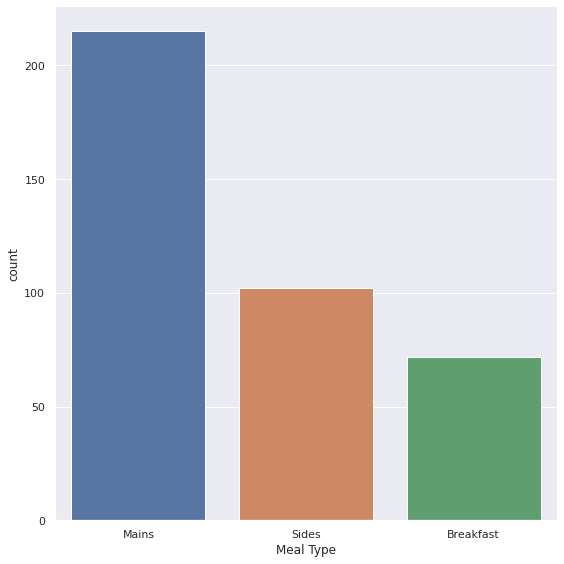

In [3]:
sb.catplot(x = "Meal Type", data = merged_data, kind = "count", 
           order = merged_data["Meal Type"].value_counts().index, height = 8)

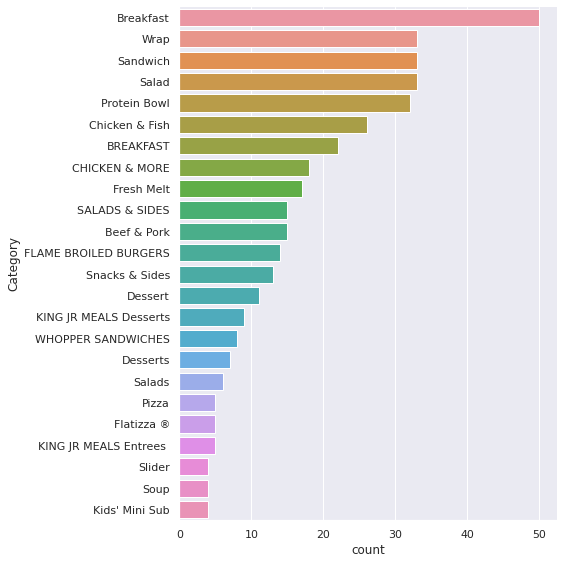

In [4]:
sb.catplot(y = "Category", data = merged_data, kind = "count", 
           order = merged_data["Category"].value_counts().index, height = 8)

Most of the items in the dataset are main course meals and most items are savoury dishes.

### 2. Nutritional Data Distribution

In [5]:
# Extract only the numeric data variables
Nutrition_data = pd.DataFrame(merged_data[['Serving Size (g)', 'Calories', 'Total Fat (g)',
       'Saturated Fat (g)', 'Trans Fat (g)', 'Cholesterol (mg)', 'Sodium (mg)',
       'Carbohydrates (g)', 'Dietary Fiber (g)', 'Sugars (g)', 'Protein (g)']])
# Summary Statistics for all Variables
Nutrition_data.describe().round(2)

Serving Size (g)  Calories  Total Fat (g)  Saturated Fat (g)  \
count            389.00    389.00         389.00             389.00   
mean             233.13    445.28          23.16               7.99   
std              108.35    223.63          15.29               5.75   
min               14.00     15.00           0.00               0.00   
25%              149.00    280.00          11.00               3.50   
50%              224.00    430.00          21.00               7.00   
75%              321.00    550.00          31.00              11.00   
max              490.00   1220.00          84.00              33.00   

       Trans Fat (g)  Cholesterol (mg)  Sodium (mg)  Carbohydrates (g)  \
count         389.00            389.00       389.00             389.00   
mean            0.31             83.56      1072.22              37.85   
std             0.67             86.15       596.81              20.07   
min             0.00              0.00         0.00               2.00   
25%             0.00             30.00       660.00              24.00   
50%             0.00             60.00      1040.00              39.00   
75%             0.00            100.00      1440.00              50.00   
max             4.50            575.00      3070.00             116.00   

       Dietary Fiber (g)  Sugars (g)  Protein (g)  
count             389.00      389.00       389.00  
mean                2.91        7.66        22.68  
std                 2.15        7.41        13.74  
min                 0.00        0.00         0.00  
25%                 1.00        4.00        13.00  
50%                 3.00        6.00        22.00  
75%                 4.00        8.00        30.00  
max                20.00       48.00        71.00

The mean values for nutritional data for most food items lie within the daily recommended amounts. However, most of the maximum values are a lot higher than recommended. Considering this would be the nutritional content for just one meal of the day, this makes these foods incredibly unhealthy.

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

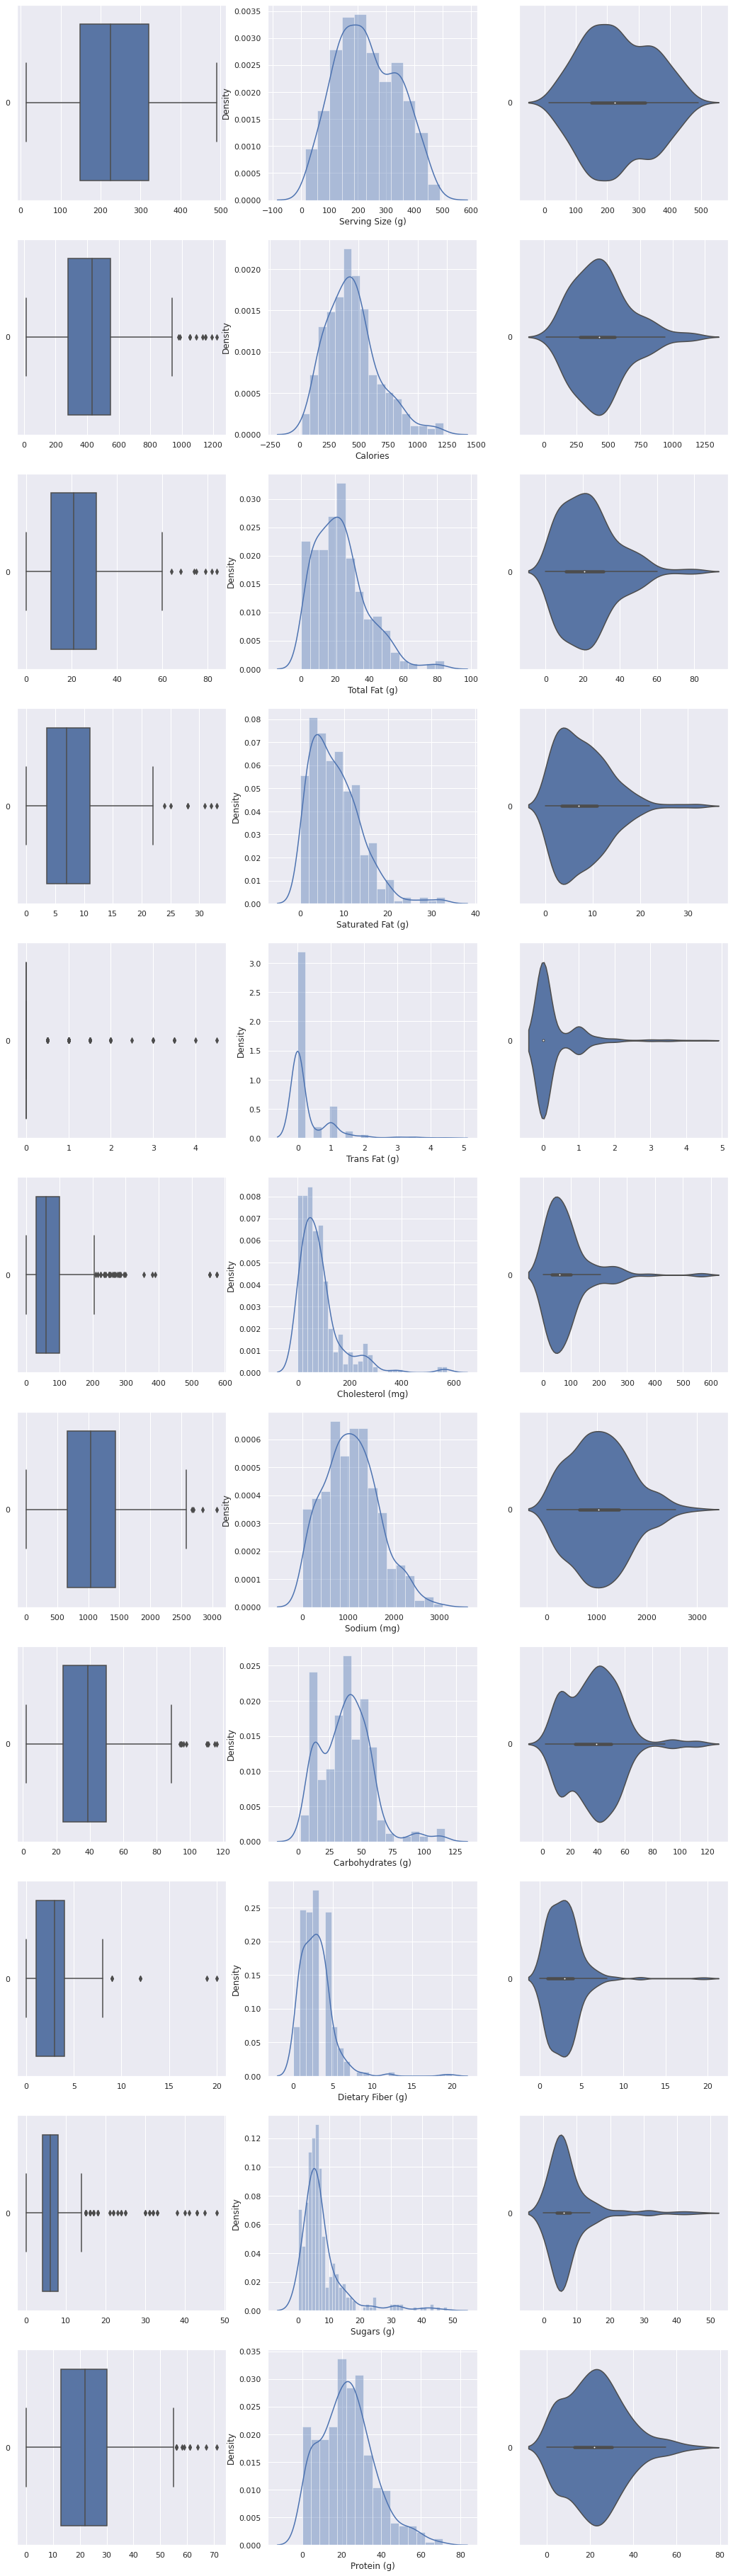

In [6]:
f, axes = plt.subplots(11, 3, figsize=(18, 66))

count = 0
for var in Nutrition_data:
    sb.boxplot(data = Nutrition_data[var], orient = "h", ax = axes[count,0])
    sb.distplot(Nutrition_data[var], ax = axes[count,1])
    sb.violinplot(data = Nutrition_data[var], orient = "h", ax = axes[count,2])
    count += 1

There is a good distribution of all nutritional data values, except of trans fat, where there are very few bins, and distribution is very uneven.

For the other nutritional data boxplots, the outliers are on the right side of the box and whiskers, suggesting there are some food items containing an excessive amount of some nutrients. For example, there are a few outliers with more than 30g of sugar, which makes these foods very unhealthy since the recommended daily sugar intake is 36g for men and 24g for women. Whilst the modal values for most of these nutritional data fall within the daily "healthy" recommended amounts, there outliers suggest there are some very unhealthy foods.

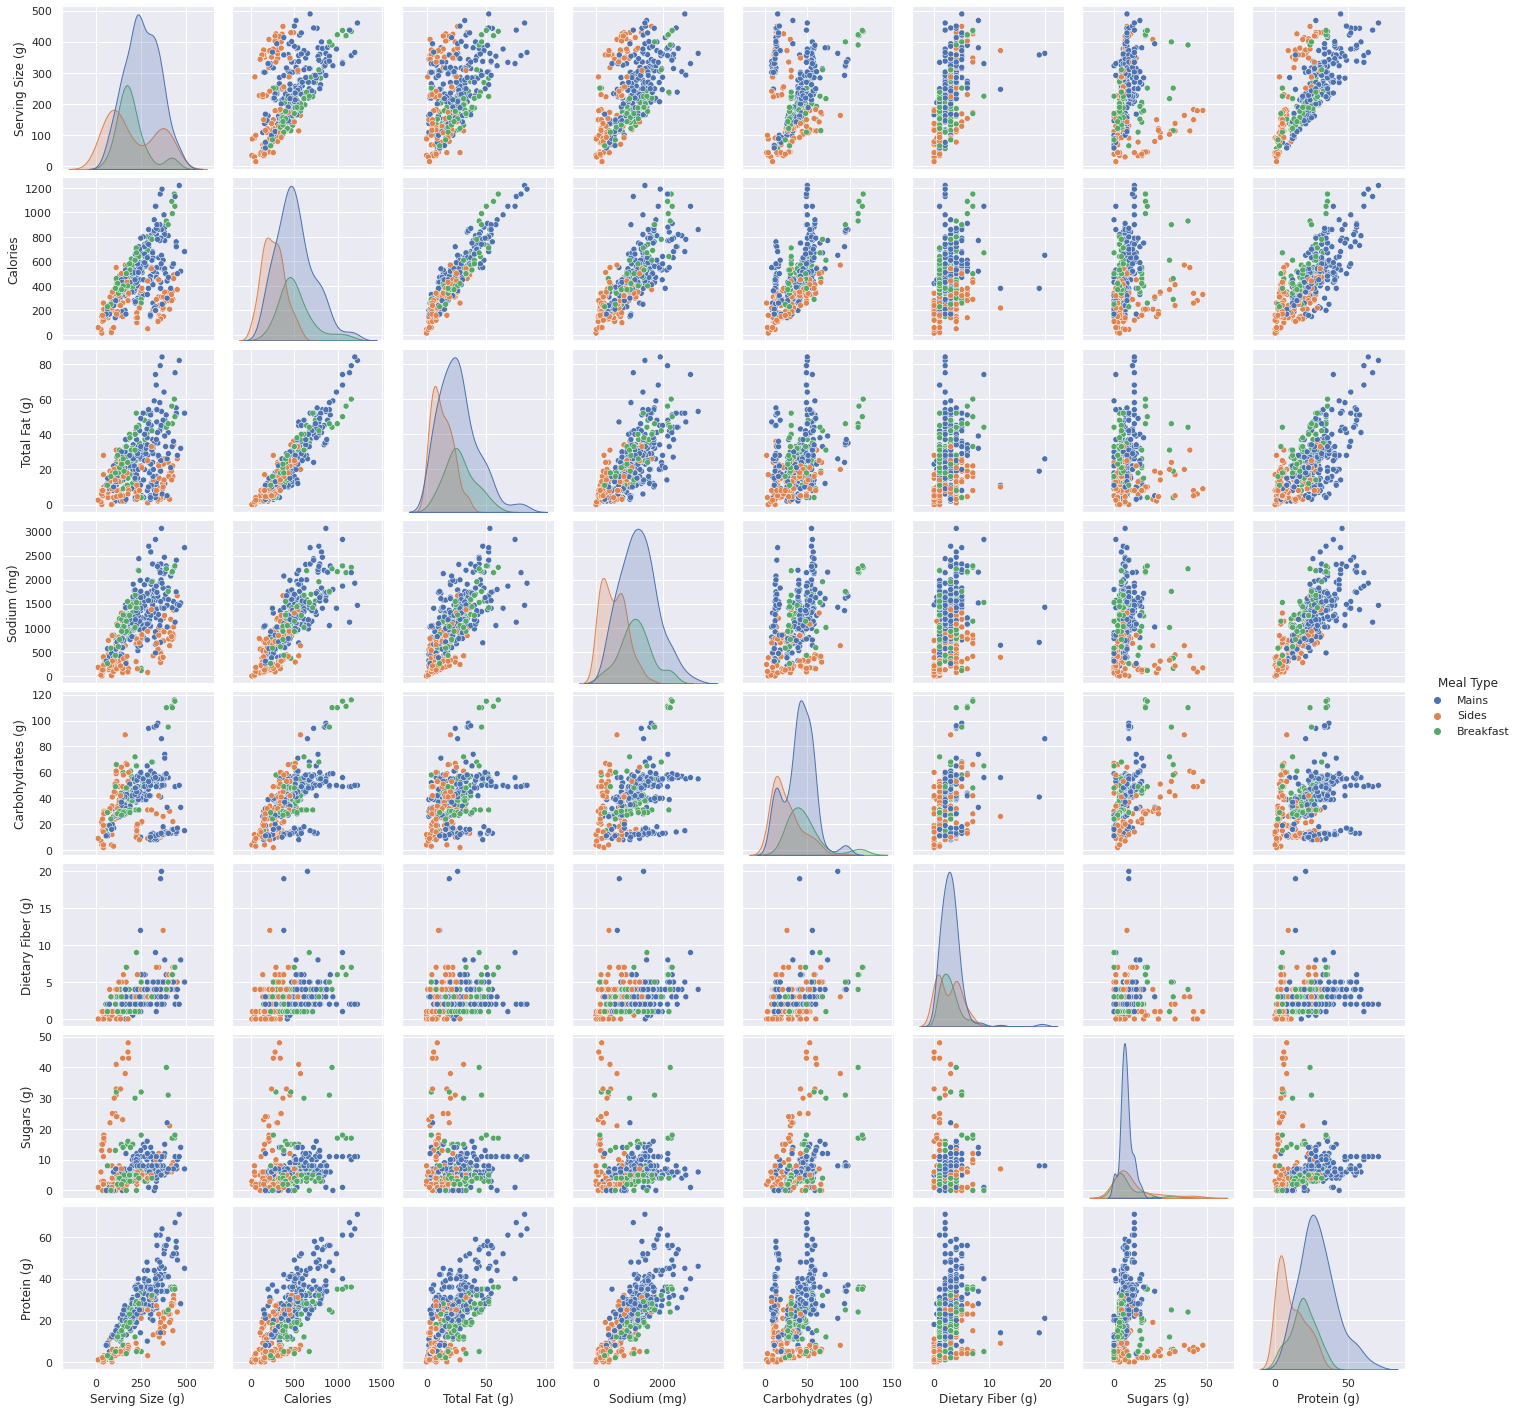

In [7]:
sb.pairplot(merged_data[['Serving Size (g)', 'Calories', 'Total Fat (g)',
       'Sodium (mg)','Carbohydrates (g)', 'Dietary Fiber (g)','Sugars (g)','Protein (g)','Meal Type']], hue="Meal Type")

Plotting a pairplot on select columns, we can see that the kde distributions for some nutritional data are a little different for the different meal types. We will explore the different meal types individually later on.

The scatter plots suggest that the strongest positive linear correlations occur between calories and total fats, and calories and sodium. This suggests most high-calorie foods in the dataset are fatty and salty.  

### 3. Nutritional Data Correlation 

In [8]:
Nutrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serving Size (g)   389 non-null    float64
 1   Calories           389 non-null    int64  
 2   Total Fat (g)      389 non-null    float64
 3   Saturated Fat (g)  389 non-null    float64
 4   Trans Fat (g)      389 non-null    float64
 5   Cholesterol (mg)   389 non-null    int64  
 6   Sodium (mg)        389 non-null    int64  
 7   Carbohydrates (g)  389 non-null    int64  
 8   Dietary Fiber (g)  389 non-null    float64
 9   Sugars (g)         389 non-null    int64  
 10  Protein (g)        389 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 33.6 KB


<AxesSubplot:>

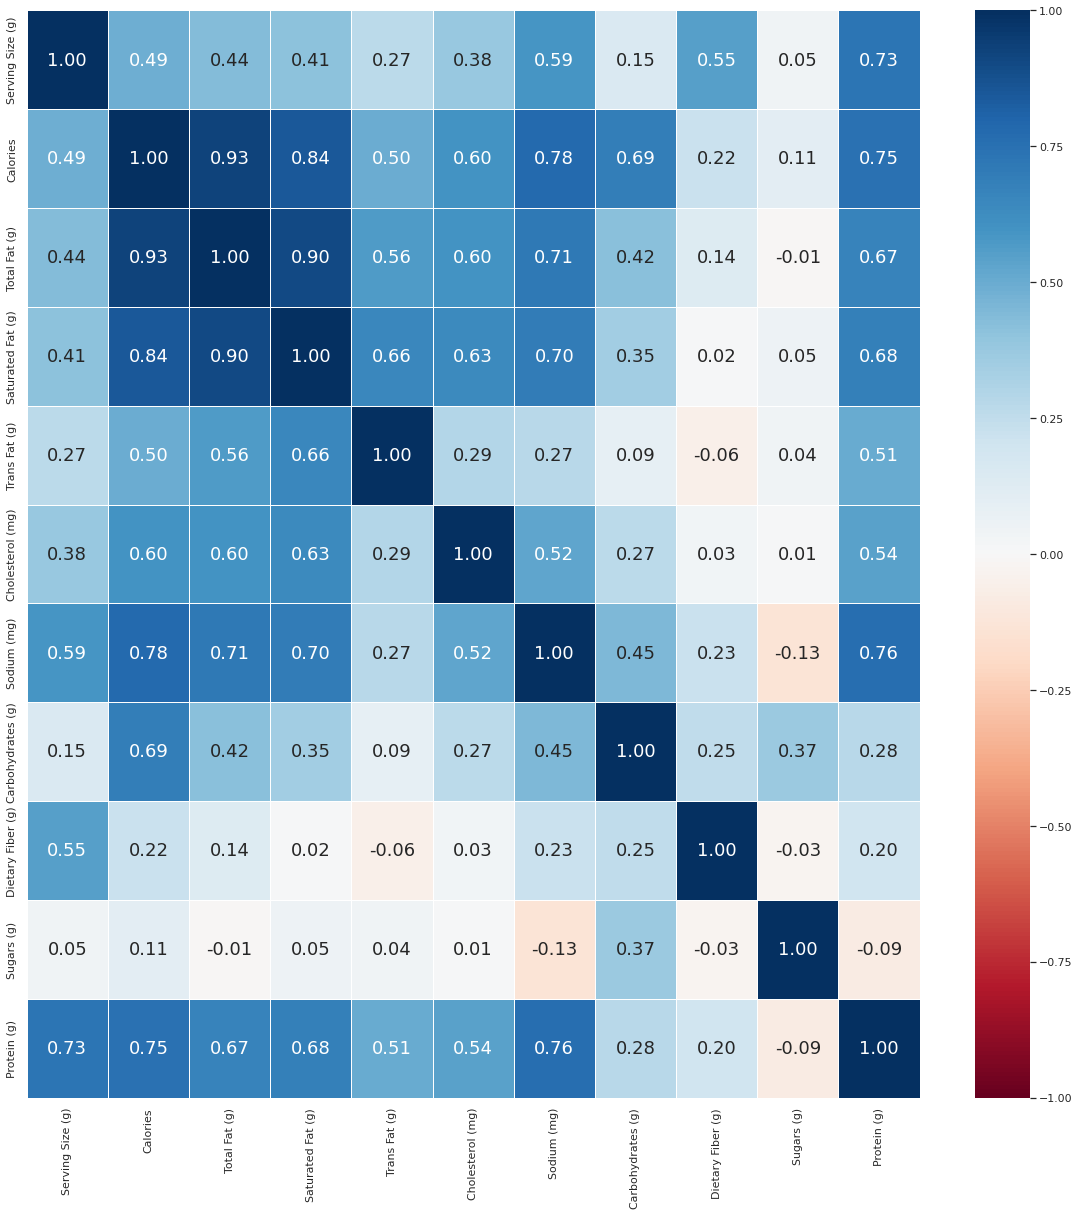

In [9]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(Nutrition_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

**Observation 1**: The correlation bw serving size and all other nutritional metrics are mostly moderately high. This makes sense, since the <u>larger the quantity of food, the more nutrients it is likely to have</u>. We expected calories to have a very strong positive correlation with serving size. However, serving size has a higher correlation with protein rather than calories. It is possible that <u>most low protein foods (desserts) are served in smaller portions, and large meals have a lot of meat.</u>

**Observation 2**: Sugar has a moderate negative correlation with fat, sodium, fibre and protein, which is expected since sweet dishes are unlikely to contain much vegetables or meat. Interestingly, although studies show that foods high in sugar are higher in calories theres quite a low positive correlation here. This is likely because <u>most items in the dataset are savoury dishes that are high in calories</u>. (This is further reinforced by the category plot in part 1 and low correlation between serving size and sugar observed above) Sugar has a moderate positive correlation with carbohydrates which suggests that <u>most of the sugary foods are carbohydrates like cookies, pastries and bread.</u> 

**Observation 3**: We can also observe the correlation between the 2 "positive" measures of nutrition (protein and dietary fibre, where a larger intake is better) against the "negative" measures of nutrition (calories, fat, cholesterol, sodium, sugars, where intake should be more controlled). The correlation between protein and "negative" measures of nutrition is high, suggesting that many fast foods may have "positive" nutrients, but that is counteracted by an unhealthy amount of "negative" nutrients. It is possible that the nutritious foods are prepared in an unhealthy way e.g. frying meats. We can infer that <u>just because a food has "healthy" traits (e.g. high in fibre) does not mean that corresponds with a lack of "unhealthy" traits (e.g. high in cholesterol).</u>

**Observation 4**: There is a strong positive correlation amongst calories, saturated fat and total fat, suggests <u>most of the food that is fatty is also high in calories</u>. The moderate positive correlation between trans fats and total fat, however, could imply that <u>most of the fats in the items is comprised of saturated fats.</u> This makes sense, since saturated fats are naturally found in meat and dairy, while trans fats are mostly added to food through hydrogenated oil. Plus, trans fats are known to be more harmful/unhealthy than saturated fats, so the lack of trans fats in the dataset's items could suggest <u>fast food joints do care about their food's nutritional standards.</u>

**Observation 5**: Unsurprisingly theres a very strong correlation amongst calories, protein, total fats, saturated fats and sodium, suggesting <u>most items in the dataset that are savoury are also "unhealthy"</u>.


### 4. Creating Unhealthy Index

Unhealthy index considers 5 different "negative" measures of nutrition and counts the number of metrics each item violates. We created this as a way to measure how "unhealthy" an item of food is. Furthermore, counting the number of "negative" measures it violates gives us a better visual insight to compare how "unhealthy"/"healthy" the options are across the 3 different restaurants.

In [10]:
def unhealthyindex(row):
    count = 0
    if row["Saturated Fat (g)"] > 13/3:
        count +=1
    if row["Trans Fat (g)"] >= 2/3:
        count +=1
    if row["Cholesterol (mg)"] > 300/3:
        count +=1
    if row["Sugars (g)"] > 24/3:
        count +=1
    if row["Sodium (mg)"] > 2300/3:
        count +=1
    return int(count)

In [11]:
merged_data["Unhealthy index"] = merged_data.apply(lambda row: unhealthyindex(row), axis=1)
merged_data["Unhealthy index"] = merged_data["Unhealthy index"].astype('category')
merged_data


Item   Category  \
0                                 6" All-American Club   Sandwich   
1                                  6" Black Forest Ham   Sandwich   
2            6" Buffalo Chicken (with Grilled Chicken)   Sandwich   
3      6" Chicken & Bacon Ranch (with Grilled Chicken)   Sandwich   
4    6" Chicken & Bacon Ranch (with Rotisserie-Styl...   Sandwich   
..                                                 ...        ...   
384                                Hash Browns - small  BREAKFAST   
385                               Hash Browns - medium  BREAKFAST   
386                                Hash Browns - large  BREAKFAST   
387                      French Toast Sticks (3 piece)  BREAKFAST   
388                      French Toast Sticks (5 piece)  BREAKFAST   

     Serving Size (g)  Calories  Total Fat (g)  Saturated Fat (g)  \
0               211.0       350           13.0                6.0   
1               219.0       270            4.0                1.0   
2               248.0       340           12.0                3.0   
3               256.0       510           27.0               10.0   
4               256.0       530           29.0               11.0   
..                ...       ...            ...                ...   
384              84.0       250           16.0                3.5   
385             169.0       500           33.0                7.0   
386             225.0       670           44.0                9.0   
387              65.0       230           11.0                2.0   
388             109.0       380           18.0                3.0   

     Trans Fat (g)  Cholesterol (mg)  Sodium (mg)  Carbohydrates (g)  \
0              0.0                55         1220                 39   
1              0.0                30          810                 41   
2              0.0                55         1360                 39   
3              0.0               100         1020                 39   
4              0.0               105         1200                 39   
..             ...               ...          ...                ...   
384            0.0                 0          580                 24   
385            0.0                 0         1140                 48   
386            0.0                 0         1530                 65   
387            0.0                 0          260                 29   
388            0.0                 0          430                 49   

     Dietary Fiber (g)  Sugars (g)  Protein (g)   Restaurant  Meal Type  \
0                  1.0           5           25       Subway      Mains   
1                  4.0           6           18       Subway      Mains   
2                  2.0           4           24       Subway      Mains   
3                  2.0           5           36       Subway      Mains   
4                  2.0           5           34       Subway      Mains   
..                 ...         ...          ...          ...        ...   
384                3.0           0            2  Burger King  Breakfast   
385                7.0           0            4  Burger King  Breakfast   
386                9.0           0            5  Burger King  Breakfast   
387                1.0           8            3  Burger King  Breakfast   
388                2.0          13            5  Burger King  Breakfast   

    Unhealthy index  
0                 2  
1                 1  
2                 1  
3                 2  
4                 3  
..              ...  
384               0  
385               2  
386               2  
387               0  
388               1  

[389 rows x 16 columns]

In [12]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Item               389 non-null    object  
 1   Category           389 non-null    object  
 2   Serving Size (g)   389 non-null    float64 
 3   Calories           389 non-null    int64   
 4   Total Fat (g)      389 non-null    float64 
 5   Saturated Fat (g)  389 non-null    float64 
 6   Trans Fat (g)      389 non-null    float64 
 7   Cholesterol (mg)   389 non-null    int64   
 8   Sodium (mg)        389 non-null    int64   
 9   Carbohydrates (g)  389 non-null    int64   
 10  Dietary Fiber (g)  389 non-null    float64 
 11  Sugars (g)         389 non-null    int64   
 12  Protein (g)        389 non-null    int64   
 13  Restaurant         389 non-null    object  
 14  Meal Type          389 non-null    object  
 15  Unhealthy index    389 non-null    category
dtypes: categ

In [13]:
merged_data.to_csv('datasets/Merged_data_unhealthymetric.csv', index=False)

## EDA &amp; Insights by Meal Type

### 1. Breakfast

In [14]:
Breakfasts = merged_data.loc[merged_data["Meal Type"] == "Breakfast"]
Breakfasts

Item   Category  \
152  6" Black Forest Ham, Egg White & Cheese Flatbread  Breakfast   
153                    6" Egg White & Cheese Flatbread  Breakfast   
154             6" Bacon, Egg White & Cheese Flatbread  Breakfast   
155             6" Steak, Egg White & Cheese Flatbread  Breakfast   
156        6" Black Forest Ham, Egg & Cheese Flatbread  Breakfast   
..                                                 ...        ...   
384                                Hash Browns - small  BREAKFAST   
385                               Hash Browns - medium  BREAKFAST   
386                                Hash Browns - large  BREAKFAST   
387                      French Toast Sticks (3 piece)  BREAKFAST   
388                      French Toast Sticks (5 piece)  BREAKFAST   

     Serving Size (g)  Calories  Total Fat (g)  Saturated Fat (g)  \
152             203.0       390           12.0                4.0   
153             174.0       350           11.0                4.0   
154             189.0       430           17.0                6.0   
155             217.0       420           14.0                5.0   
156             203.0       480           23.0                6.0   
..                ...       ...            ...                ...   
384              84.0       250           16.0                3.5   
385             169.0       500           33.0                7.0   
386             225.0       670           44.0                9.0   
387              65.0       230           11.0                2.0   
388             109.0       380           18.0                3.0   

     Trans Fat (g)  Cholesterol (mg)  Sodium (mg)  Carbohydrates (g)  \
152            0.0                25         1110                 45   
153            0.0                10          870                 44   
154            0.0                30         1040                 44   
155            0.0                45         1140                 45   
156            0.0               265         1040                 44   
..             ...               ...          ...                ...   
384            0.0                 0          580                 24   
385            0.0                 0         1140                 48   
386            0.0                 0         1530                 65   
387            0.0                 0          260                 29   
388            0.0                 0          430                 49   

     Dietary Fiber (g)  Sugars (g)  Protein (g)   Restaurant  Meal Type  \
152                2.0           4           23       Subway  Breakfast   
153                2.0           3           18       Subway  Breakfast   
154                2.0           4           23       Subway  Breakfast   
155                2.0           3           28       Subway  Breakfast   
156                2.0           3           23       Subway  Breakfast   
..                 ...         ...          ...          ...        ...   
384                3.0           0            2  Burger King  Breakfast   
385                7.0           0            4  Burger King  Breakfast   
386                9.0           0            5  Burger King  Breakfast   
387                1.0           8            3  Burger King  Breakfast   
388                2.0          13            5  Burger King  Breakfast   

    Unhealthy index  
152               1  
153               1  
154               2  
155               2  
156               3  
..              ...  
384               0  
385               2  
386               2  
387               0  
388               1  

[72 rows x 16 columns]

In [15]:
Breakfasts.describe().round(2)

Serving Size (g)  Calories  Total Fat (g)  Saturated Fat (g)  \
count             72.00     72.00          72.00              72.00   
mean             197.40    516.39          27.88              10.17   
std               83.07    201.24          12.66               4.87   
min               56.00    150.00           4.00               1.50   
25%              150.75    400.00          19.75               7.00   
50%              177.50    470.00          26.00               9.00   
75%              217.25    587.50          35.50              13.25   
max              437.00   1150.00          60.00              20.00   

       Trans Fat (g)  Cholesterol (mg)  Sodium (mg)  Carbohydrates (g)  \
count          72.00             72.00        72.00              72.00   
mean            0.08            154.65      1193.26              47.06   
std             0.27            151.70       492.25              22.33   
min             0.00              0.00       115.00              15.00   
25%             0.00             33.75       917.50              31.00   
50%             0.00             97.50      1180.00              43.50   
75%             0.00            250.00      1472.50              52.00   
max             1.50            575.00      2290.00             116.00   

       Dietary Fiber (g)  Sugars (g)  Protein (g)  
count              72.00       72.00        72.00  
mean                2.79        7.61        19.15  
std                 1.71        8.65         8.68  
min                 1.00        0.00         1.00  
25%                 2.00        3.00        13.75  
50%                 2.00        4.00        19.00  
75%                 3.25        9.25        25.25  
max                 9.00       40.00        36.00

Here are the violin plots comparing the Breakfast options available at the 3 fast food restaurants.


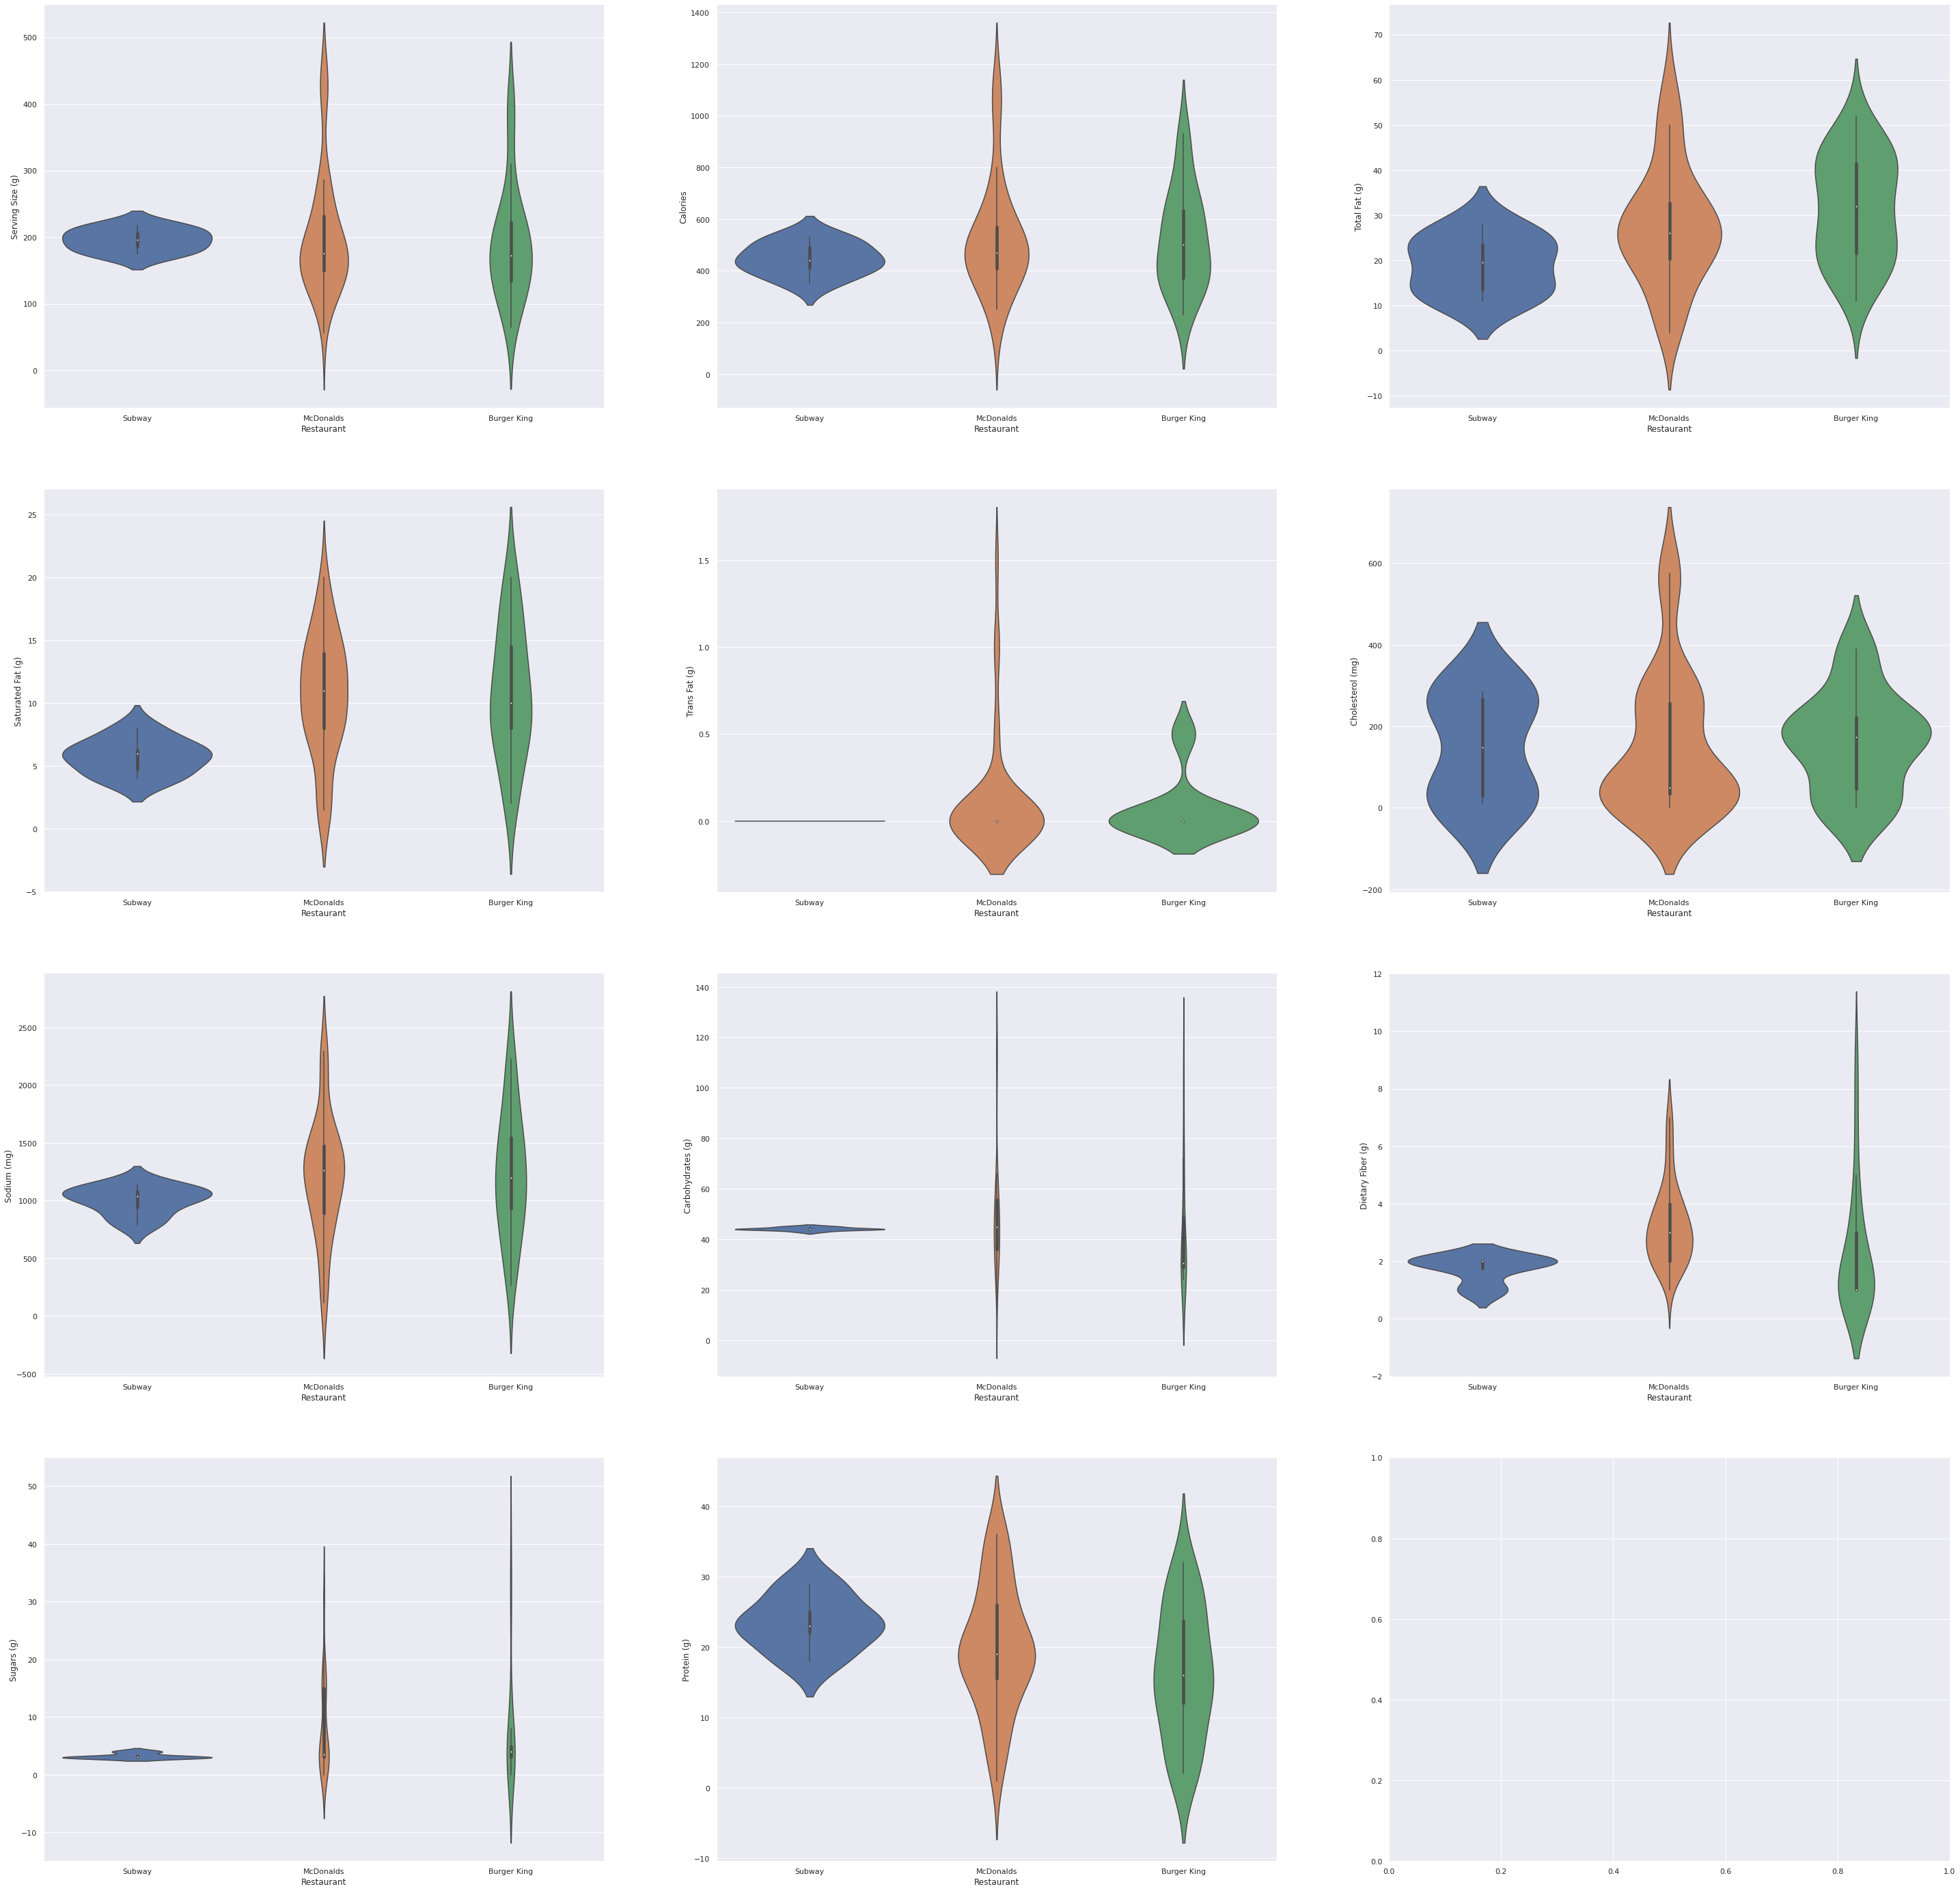

In [16]:
# Draw the distributions of all variables
f, axes = plt.subplots(4,3, figsize=(50, 50))
variables = ['Serving Size (g)', 'Calories', 'Total Fat (g)',
       'Saturated Fat (g)', 'Trans Fat (g)', 'Cholesterol (mg)', 'Sodium (mg)',
       'Carbohydrates (g)', 'Dietary Fiber (g)', 'Sugars (g)', 'Protein (g)']
hori = 0 
vert = 0
for var in variables:
    sb.violinplot(x = "Restaurant", y = var, data = Breakfasts, ax = axes[vert,hori])
    hori += 1
    if (hori)%3 == 0:
        vert += 1
        hori = 0

We can make several general observations from this violin plot:
* Subway: due to the small sample size (8), it is unsurprising that Subway has the smallest IQR and range for all metrics. This would also suggest the 8 items' nutritional values are very similar/ clustered together. All of Subway's items have no trans fats. This is unlike the other 2 restaurants.
* McDonald's: has the largest IQR and range for most metrics. Most notably, it has the items with the highest trans fat and cholesterol.
* Burger King: items have the highest mean value for several metrics. It also has the items that are the highest in dietary fibre and sugar.

From this initial analysis, it would appear Subway has the largest ratio of healthy items, followed by Burger King then McDonalds is unhealthiest.

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


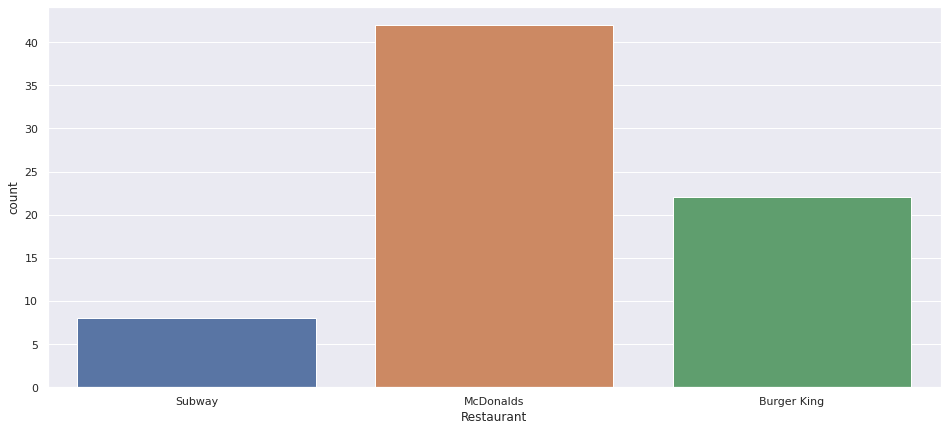

In [17]:
plt.figure(figsize=(16, 7))
sb.countplot(Breakfasts["Restaurant"])
plt.show()

In [18]:
print("Total: "+str(Breakfasts["Item"].count()))
print("Subway has " + str(sum(Breakfasts['Restaurant'] == 'Subway')) + " breakfast options.")
print("McDonalds has " + str(sum(Breakfasts['Restaurant'] == 'McDonalds')) + " breakfast options.")
print("Burger King has " + str(sum(Breakfasts['Restaurant'] == 'Burger King')) + " breakfast options.")

Total: 72
Subway has 8 breakfast options.
McDonalds has 42 breakfast options.
Burger King has 22 breakfast options.


### Comparing Unhealthy Breakfast options

When deciding whether a menu item has passed the nutritional recommendations, we used 1/3 the recommended daily intake for breakfast.

In [19]:
#find unhealthy breakfast options that have failed any of the nutritional recommendations
unhealthyfoods = Breakfasts.loc[(Breakfasts["Saturated Fat (g)"] > 13/3)|(Breakfasts["Trans Fat (g)"] >= 2/3)|(Breakfasts["Cholesterol (mg)"] > 300/3)|(Breakfasts["Sodium (mg)"] > 2300/3)|(Breakfasts["Sugars (g)"] > 24/3)]
unhealthyfoods["Item"].count()

69

In [20]:
unhealthyfoods

Item   Category  \
152  6" Black Forest Ham, Egg White & Cheese Flatbread  Breakfast   
153                    6" Egg White & Cheese Flatbread  Breakfast   
154             6" Bacon, Egg White & Cheese Flatbread  Breakfast   
155             6" Steak, Egg White & Cheese Flatbread  Breakfast   
156        6" Black Forest Ham, Egg & Cheese Flatbread  Breakfast   
..                                                 ...        ...   
382           NY Ultimate Platter (Regional menu item)  BREAKFAST   
383                        Pancake and Sausage platter  BREAKFAST   
385                               Hash Browns - medium  BREAKFAST   
386                                Hash Browns - large  BREAKFAST   
388                      French Toast Sticks (5 piece)  BREAKFAST   

     Serving Size (g)  Calories  Total Fat (g)  Saturated Fat (g)  \
152             203.0       390           12.0                4.0   
153             174.0       350           11.0                4.0   
154             189.0       430           17.0                6.0   
155             217.0       420           14.0                5.0   
156             203.0       480           23.0                6.0   
..                ...       ...            ...                ...   
382             400.0       900           46.0               12.0   
383             217.0       610           31.0                9.0   
385             169.0       500           33.0                7.0   
386             225.0       670           44.0                9.0   
388             109.0       380           18.0                3.0   

     Trans Fat (g)  Cholesterol (mg)  Sodium (mg)  Carbohydrates (g)  \
152            0.0                25         1110                 45   
153            0.0                10          870                 44   
154            0.0                30         1040                 44   
155            0.0                45         1140                 45   
156            0.0               265         1040                 44   
..             ...               ...          ...                ...   
382            0.0               380         1760                 95   
383            0.0                80         1010                 72   
385            0.0                 0         1140                 48   
386            0.0                 0         1530                 65   
388            0.0                 0          430                 49   

     Dietary Fiber (g)  Sugars (g)  Protein (g)   Restaurant  Meal Type  \
152                2.0           4           23       Subway  Breakfast   
153                2.0           3           18       Subway  Breakfast   
154                2.0           4           23       Subway  Breakfast   
155                2.0           3           28       Subway  Breakfast   
156                2.0           3           23       Subway  Breakfast   
..                 ...         ...          ...          ...        ...   
382                5.0          31           25  Burger King  Breakfast   
383                1.0          30           12  Burger King  Breakfast   
385                7.0           0            4  Burger King  Breakfast   
386                9.0           0            5  Burger King  Breakfast   
388                2.0          13            5  Burger King  Breakfast   

    Unhealthy index  
152               1  
153               1  
154               2  
155               2  
156               3  
..              ...  
382               4  
383               3  
385               2  
386               2  
388               1  

[69 rows x 16 columns]

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


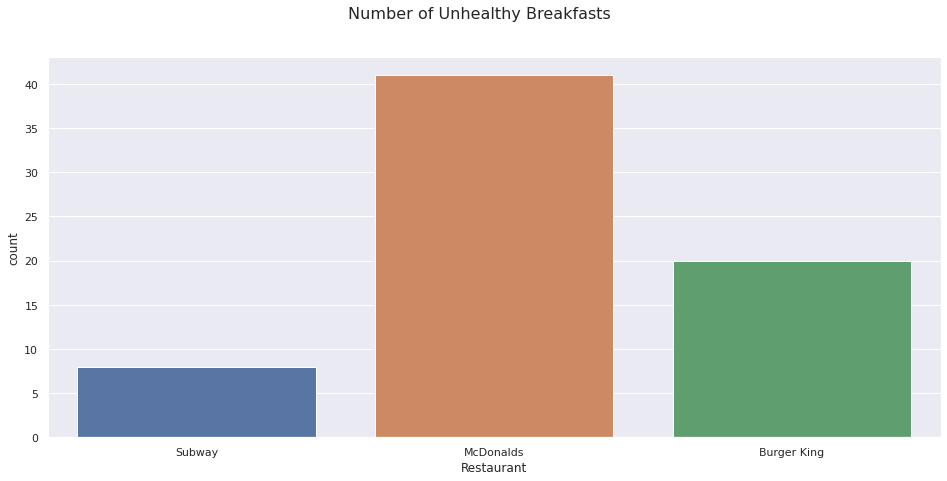

In [21]:
plt.figure(figsize=(16, 7))
plt.suptitle('Number of Unhealthy Breakfasts', fontsize=16)
sb.countplot(unhealthyfoods["Restaurant"])
plt.show()

McDonalds has the most number of breakfasts that did not pass at least one of the nutritional recommendations.

### Comparing Healthy Breakfast Options

In [22]:
#find healthy breakfast options that have not failed any of the nutritional recommendations
healthyfoods = Breakfasts.loc[(Breakfasts["Saturated Fat (g)"] <= 13/3)&(Breakfasts["Trans Fat (g)"] < 2/3)&(Breakfasts["Cholesterol (mg)"] <= 300/3)&(Breakfasts["Sodium (mg)"] <= 2300/3)&(Breakfasts["Sugars (g)"] <= 24/3)]
healthyfoods["Item"].count()

3

In [23]:
healthyfoods

Item   Category  Serving Size (g)  Calories  \
227                     Hash Brown  Breakfast              56.0       150   
384            Hash Browns - small  BREAKFAST              84.0       250   
387  French Toast Sticks (3 piece)  BREAKFAST              65.0       230   

     Total Fat (g)  Saturated Fat (g)  Trans Fat (g)  Cholesterol (mg)  \
227            9.0                1.5            0.0                 0   
384           16.0                3.5            0.0                 0   
387           11.0                2.0            0.0                 0   

     Sodium (mg)  Carbohydrates (g)  Dietary Fiber (g)  Sugars (g)  \
227          310                 15                2.0           0   
384          580                 24                3.0           0   
387          260                 29                1.0           8   

     Protein (g)   Restaurant  Meal Type Unhealthy index  
227            1    McDonalds  Breakfast               0  
384            2  Burger King  Breakfast               0  
387            3  Burger King  Breakfast               0

In [24]:
healthyfoods["Item"]

227                       Hash Brown
384              Hash Browns - small
387    French Toast Sticks (3 piece)
Name: Item, dtype: object

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


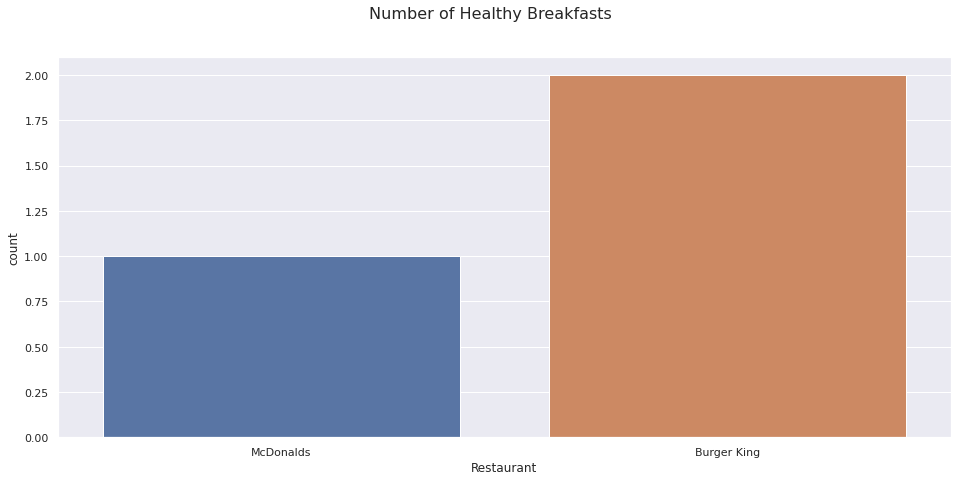

In [25]:
plt.figure(figsize=(16, 7))
plt.suptitle('Number of Healthy Breakfasts', fontsize=16)
sb.countplot(healthyfoods["Restaurant"])
plt.show()

None of the Breakfast options at Subway have passed all the recommended requirements.
Hash Brown from Macdonalds as well as "Hash Browns - small" and "French Toast Sticks (3 piece)" from Burger King are Healthy based on the recommended requirements.

These results are very interesting as they completely contradict our earlier analysis. However, it's worth noting only 3 of 73 (4%) breakfast items are considered healthy. This means the only healthy items are ranked on the lower extremes of the violin plots from earlier. Despite Subway having low mean values and IQR, those are only relative results, and when compared to an external standard of health, all its items violate several metrics. Although McDonalds and Burger King performed relatively worse (based on violin plots), when it came to the external criteria, they each had at least 1 item ("anomalies") that did pass the health test.

### 2. Mains

In [26]:
mains = merged_data.loc[merged_data["Meal Type"] == "Mains"]
mains

Item  \
0                                 6" All-American Club   
1                                  6" Black Forest Ham   
2            6" Buffalo Chicken (with Grilled Chicken)   
3      6" Chicken & Bacon Ranch (with Grilled Chicken)   
4    6" Chicken & Bacon Ranch (with Rotisserie-Styl...   
..                                                 ...   
353                                       Kids Oatmeal   
354                               Chicken Nuggets- 4pc   
355                               Chicken Nuggets- 6pc   
356                                          Hamburger   
357                                       Cheeseburger   

                   Category  Serving Size (g)  Calories  Total Fat (g)  \
0                  Sandwich             211.0       350           13.0   
1                  Sandwich             219.0       270            4.0   
2                  Sandwich             248.0       340           12.0   
3                  Sandwich             256.0       510           27.0   
4                  Sandwich             256.0       530           29.0   
..                      ...               ...       ...            ...   
353  KING JR MEALS Entrees              167.0       170            3.0   
354  KING JR MEALS Entrees               58.0       170           11.0   
355  KING JR MEALS Entrees               88.0       260           16.0   
356  KING JR MEALS Entrees               99.0       240           10.0   
357  KING JR MEALS Entrees              111.0       280           13.0   

     Saturated Fat (g)  Trans Fat (g)  Cholesterol (mg)  Sodium (mg)  \
0                  6.0            0.0                55         1220   
1                  1.0            0.0                30          810   
2                  3.0            0.0                55         1360   
3                 10.0            0.0               100         1020   
4                 11.0            0.0               105         1200   
..                 ...            ...               ...          ...   
353                1.5            0.0                 5          260   
354                1.5            0.0                25          310   
355                2.5            0.0                35          470   
356                3.5            0.5                35          380   
357                6.0            0.5                45          560   

     Carbohydrates (g)  Dietary Fiber (g)  Sugars (g)  Protein (g)  \
0                   39                1.0           5           25   
1                   41                4.0           6           18   
2                   39                2.0           4           24   
3                   39                2.0           5           36   
4                   39                2.0           5           34   
..                 ...                ...         ...          ...   
353                 32                3.0          12            4   
354                 11                1.0           0            8   
355                 16                1.0           0           12   
356                 26                1.0           6           13   
357                 27                1.0           7           15   

      Restaurant Meal Type Unhealthy index  
0         Subway     Mains               2  
1         Subway     Mains               1  
2         Subway     Mains               1  
3         Subway     Mains               2  
4         Subway     Mains               3  
..           ...       ...             ...  
353  Burger King     Mains               1  
354  Burger King     Mains               0  
355  Burger King     Mains               0  
356  Burger King     Mains               0  
357  Burger King     Mains               1  

[215 rows x 16 columns]

In [27]:
mains.describe().round(2)

Serving Size (g)  Calories  Total Fat (g)  Saturated Fat (g)  \
count            215.00    215.00         215.00             215.00   
mean             256.88    509.72          26.40               9.01   
std               93.86    217.67          16.37               6.21   
min               58.00    140.00           2.00               0.00   
25%              195.00    360.00          15.00               4.50   
50%              249.00    480.00          25.00               9.00   
75%              330.00    630.00          34.00              12.00   
max              490.00   1220.00          84.00              33.00   

       Trans Fat (g)  Cholesterol (mg)  Sodium (mg)  Carbohydrates (g)  \
count         215.00            215.00       215.00             215.00   
mean            0.49             83.93      1285.91              40.56   
std             0.83             49.71       558.48              17.74   
min             0.00              0.00       210.00               8.00   
25%             0.00             50.00       850.00              29.00   
50%             0.00             80.00      1260.00              41.00   
75%             1.00            105.00      1625.00              53.00   
max             4.50            280.00      3070.00              98.00   

       Dietary Fiber (g)  Sugars (g)  Protein (g)  
count             215.00      215.00       215.00  
mean                3.03        6.52        29.37  
std                 2.23        3.33        12.86  
min                 0.00        0.00         4.00  
25%                 2.00        5.00        21.00  
50%                 3.00        6.00        28.00  
75%                 4.00        8.00        36.00  
max                20.00       22.00        71.00

Comparing the statistically summary for Mains and Breakfast (above section): most nutritional data have approximately the same mean value. Most notably, mean serving size for Mains is greater by about 60g, and mean protein is 10g higher. This makes sense since meals for lunch and dinner are likely to be larger than breakfast food, and are likely to contain more meat.

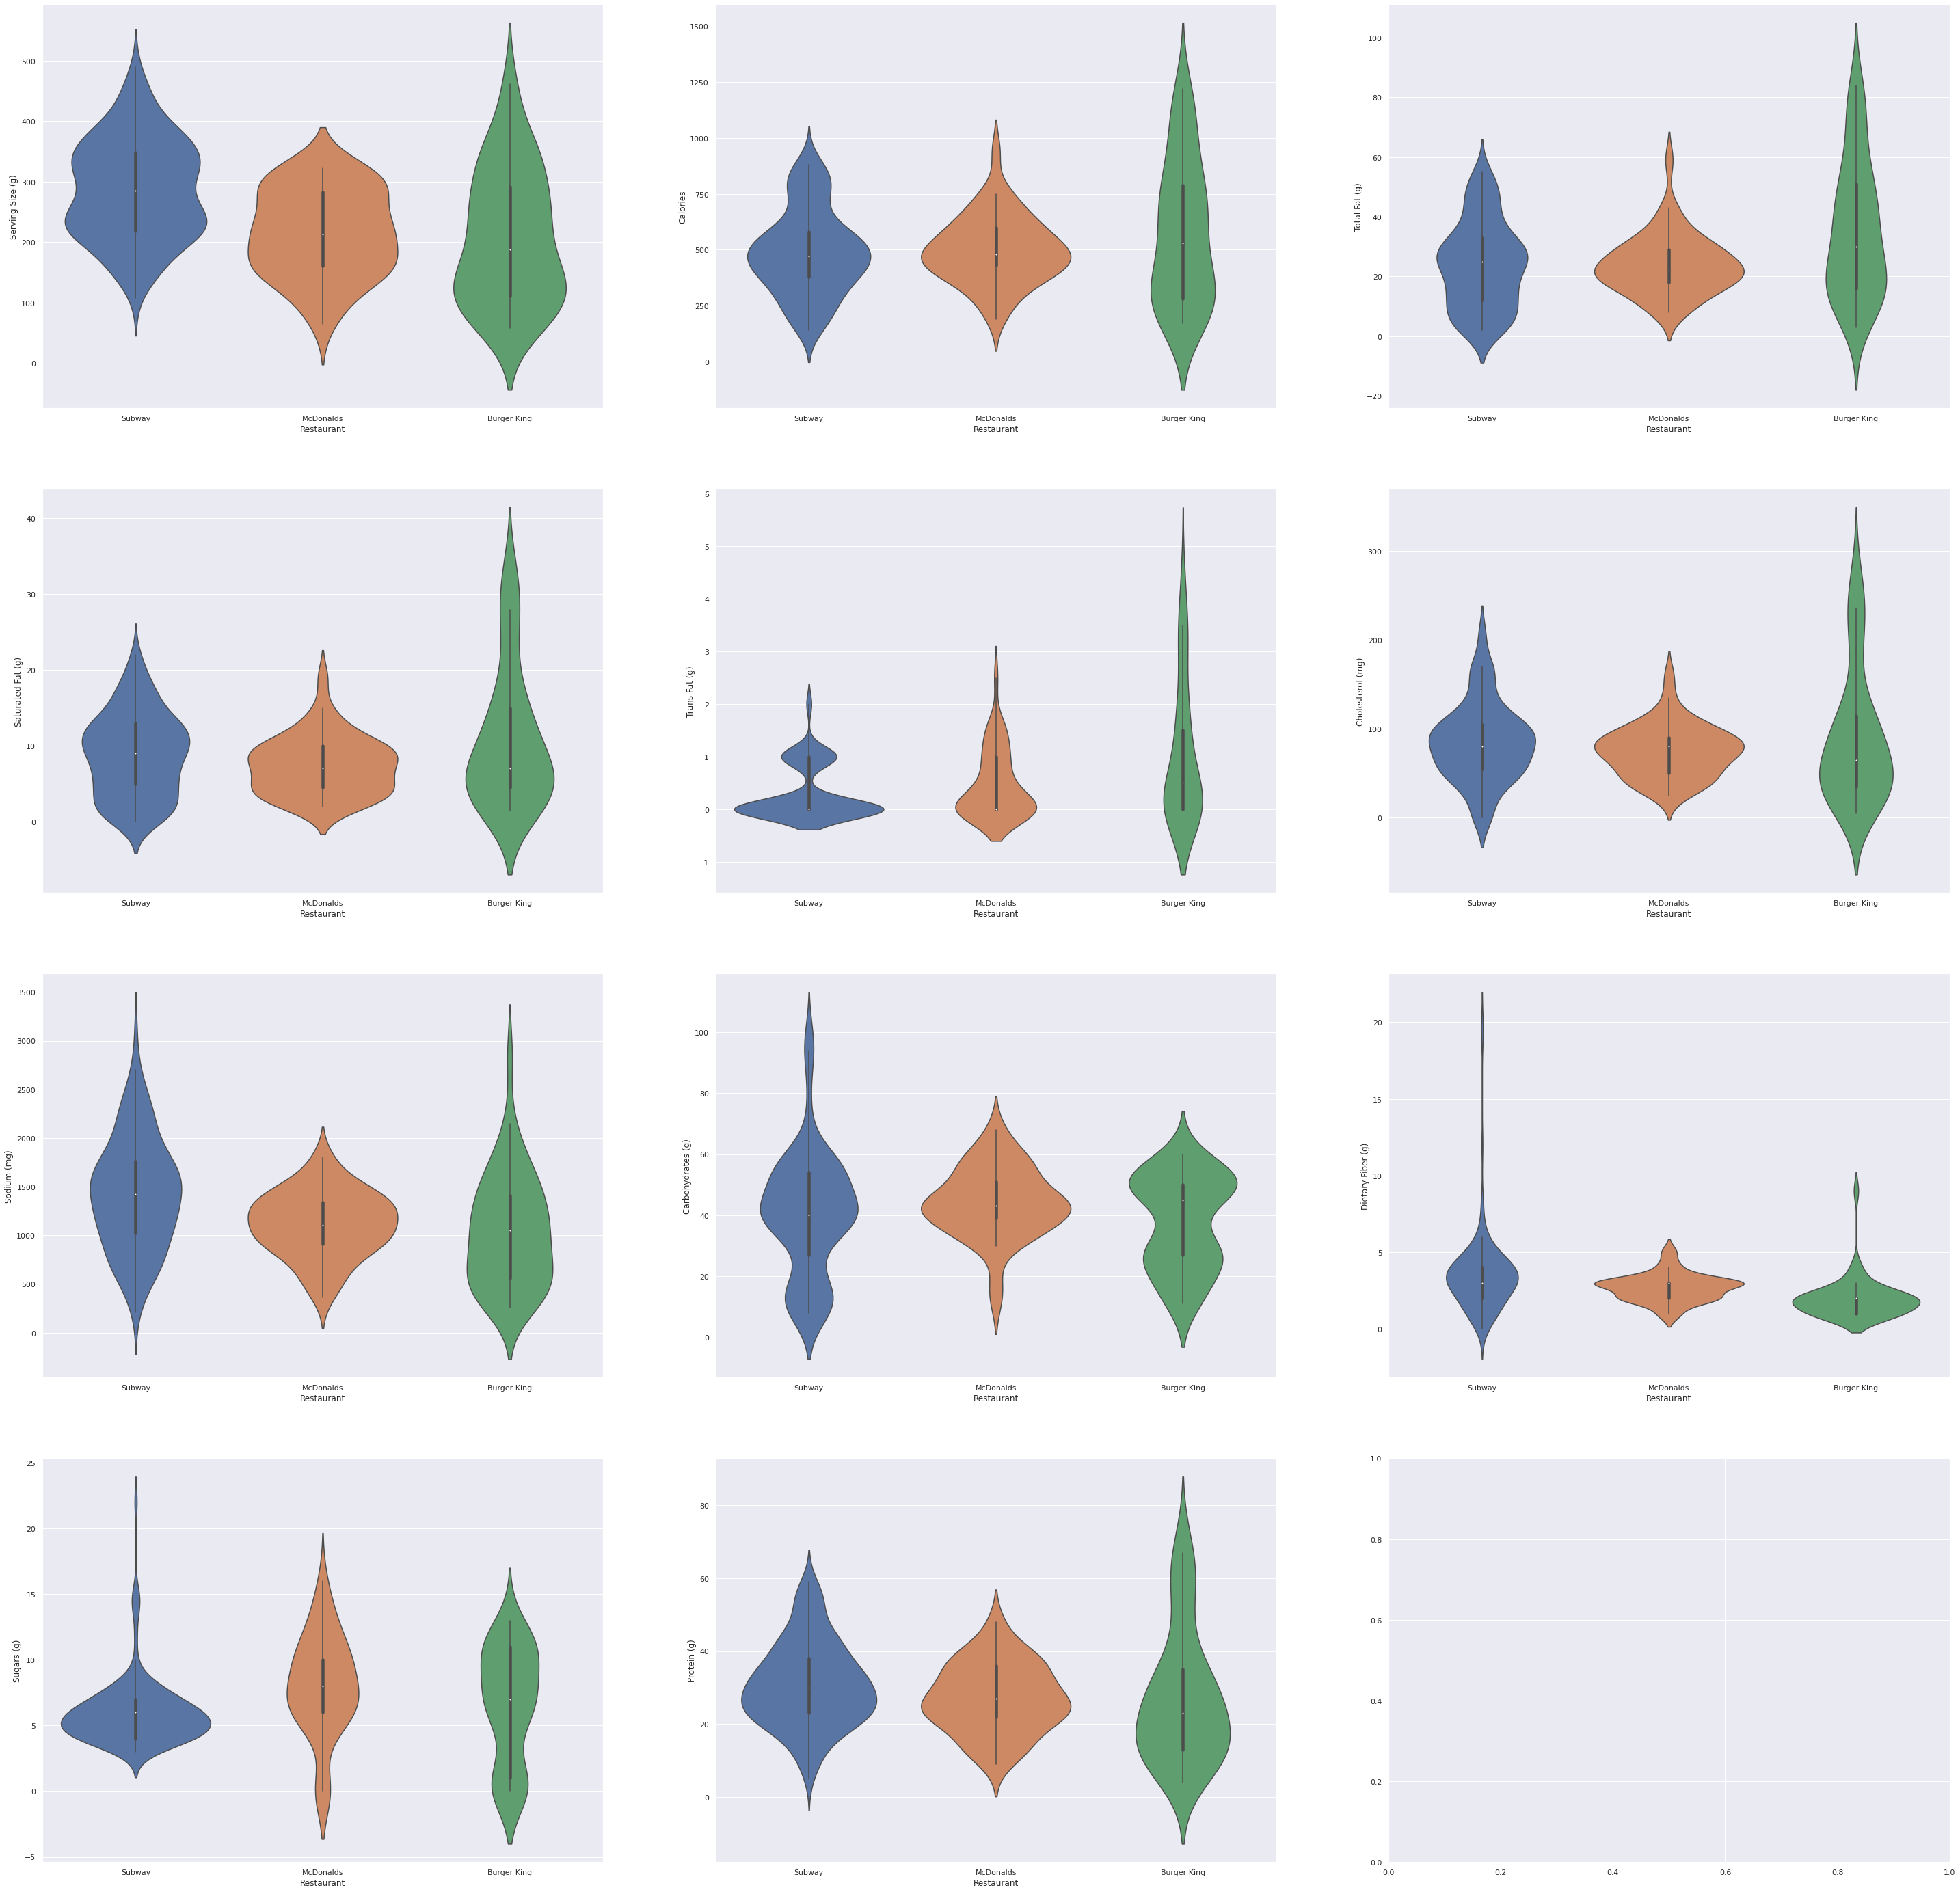

In [28]:
f, axes = plt.subplots(4,3, figsize=(50, 50))
variables = ['Serving Size (g)', 'Calories', 'Total Fat (g)',
       'Saturated Fat (g)', 'Trans Fat (g)', 'Cholesterol (mg)', 'Sodium (mg)',
       'Carbohydrates (g)', 'Dietary Fiber (g)', 'Sugars (g)', 'Protein (g)']
hori = 0 
vert = 0
for var in variables:
    sb.violinplot(x = "Restaurant", y = var, data = mains, ax = axes[vert,hori])
    hori += 1
    if (hori)%3 == 0:
        vert += 1
        hori = 0

We can make several general observations from these violin plots. 
* McDonalds sells the dishes with the largest serving sizes. Items with the highest sodium, protein, total fat, calories and carbohydrates all belong to McDonalds. However, these extremes are all outliers of the McDonalds dataset, as the majority of its items belong in the lower range of values. 
* Burger king has the largest inter-quartile range for calories, protein, total fat, trans fat and saturated fat, indicating its data is more spread out than the others. Most notably, it has more items that rank higher in all the fats and cholesterol than the other two restaurants.
* Subway's mains tend to be lower in calories and cholesterol (based on mean, max and min values), and it has some outliers that top the sugars and dietary fibre metrics. 

These general insights suggest Burger King's foods tend to be the unhealthiest, followed by McDonalds then Subway.

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


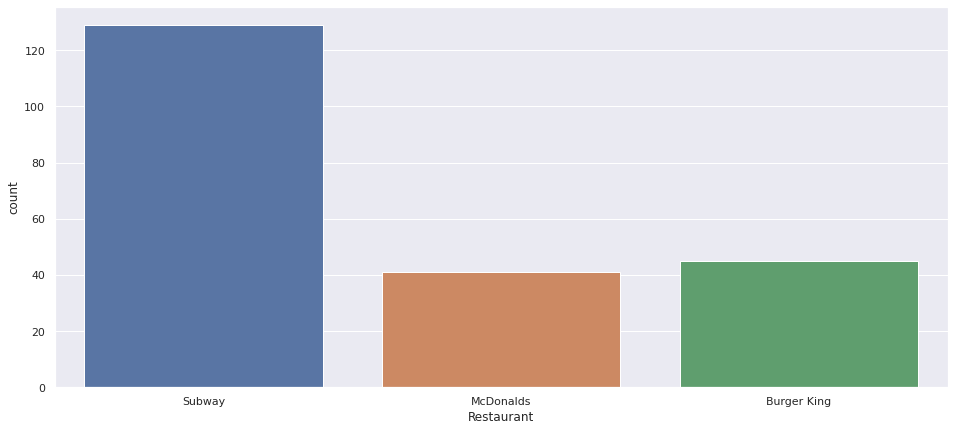

In [29]:
plt.figure(figsize=(16, 7))
sb.countplot(mains["Restaurant"])
plt.show()

In [30]:
print("Total: "+str(mains["Item"].count()))
print("Subway has " + str(sum(mains['Restaurant'] == 'Subway')) + " mains.")
print("McDonalds has " + str(sum(mains['Restaurant'] == 'McDonalds')) + " mains.")
print("Burger King has " + str(sum(mains['Restaurant'] == 'Burger King')) + " mains.")

Total: 215
Subway has 129 mains.
McDonalds has 41 mains.
Burger King has 45 mains.


### Comparing Unhealthy Mains

In [31]:
#find unhealthy Mains that have failed any of the nutritional recommendations
unhealthymains = mains.loc[(mains["Saturated Fat (g)"] > 13/3)|(mains["Trans Fat (g)"] >= 2/3)|(mains["Cholesterol (mg)"] > 300/3)|(mains["Sodium (mg)"] > 2300/3)|(mains["Sugars (g)"] > 24/3)]
unhealthymains["Item"].count()

188

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


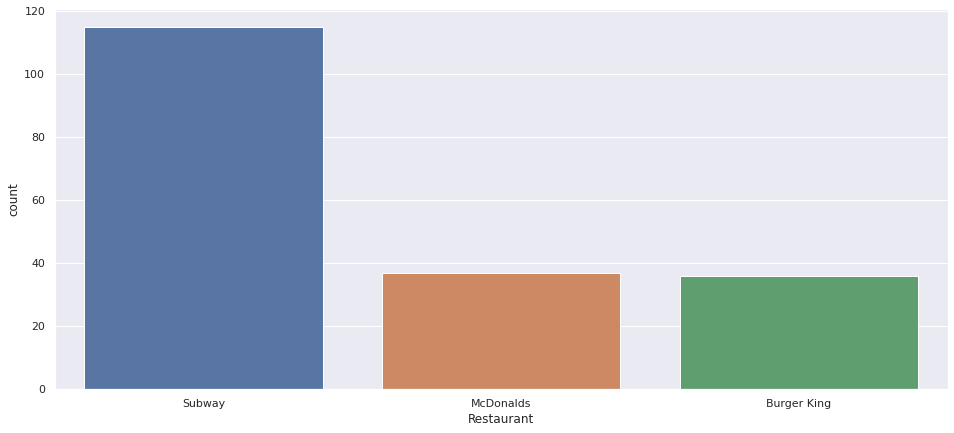

In [32]:
plt.figure(figsize=(16, 7))
sb.countplot(unhealthymains["Restaurant"])
plt.show()

Subway has the most number of mains that did not pass at least one of the nutritional recommendations

### Comparing Healthy Mains

In [33]:
#find healthy Mains that have failed none of the nutritional recommendations
healthymains = mains.loc[(mains["Saturated Fat (g)"] <= 13/3)&(mains["Trans Fat (g)"] < 2/3)&(mains["Cholesterol (mg)"] <= 300/3)&(mains["Sodium (mg)"] <= 2300/3)&(mains["Sugars (g)"] <= 24/3)]
healthymains["Item"].count()

27

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


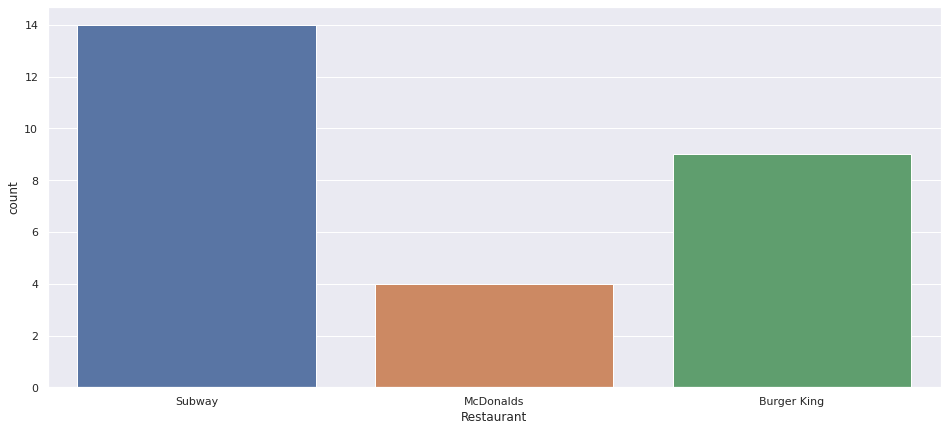

In [34]:
plt.figure(figsize=(16, 7))
sb.countplot(healthymains["Restaurant"])
plt.show()

In [35]:
print("% Healthy Meals:")
print("Subway: ", round(sum(healthymains['Restaurant']=="Subway")/sum(mains['Restaurant']=="Subway"),3)*100)
print("McDonalds: ", round(sum(healthymains['Restaurant']=="McDonalds")/sum(mains['Restaurant']=="McDonalds"),3)*100)
print("Burger King: ", round(sum(healthymains['Restaurant']=="Burger King")/sum(mains['Restaurant']=="Burger King"),3)*100)

% Healthy Meals:
Subway:  10.9
McDonalds:  9.8
Burger King:  20.0


In [36]:
healthymains[["Item","Restaurant"]]

Item   Restaurant
9                          6" Roast beef       Subway
10           6" Rotisserie-Style Chicken       Subway
16                     6" Veggie Delite®       Subway
26                    6" Grilled Chicken       Subway
27               6" Oven Roasted Chicken       Subway
32                       6" Veggie Patty       Subway
33                        Veggie Delite®       Subway
34                      Black Forest Ham       Subway
35                   Oven Roasted Turkey       Subway
36                            Roast Beef       Subway
53   Veggie Delite® on Tomato Basil Wrap       Subway
145                      Grilled Chicken       Subway
146                 Oven Roasted Chicken       Subway
151                         Veggie Patty       Subway
237                            Hamburger    McDonalds
267          Chicken McNuggets (4 piece)    McDonalds
268          Chicken McNuggets (6 piece)    McDonalds
271                         Filet-O-Fish    McDonalds
313                            Hamburger  Burger King
326             Spicy Crispy Chicken Jr.  Burger King
327                 Chicken Nuggets- 4pc  Burger King
328                 Chicken Nuggets- 6pc  Burger King
331           Spicy Chicken Nuggets- 4pc  Burger King
336                          Crispy Taco  Burger King
354                 Chicken Nuggets- 4pc  Burger King
355                 Chicken Nuggets- 6pc  Burger King
356                            Hamburger  Burger King

Subways has the most number of healthy mains and McDonalds has the least number of healthy mains. However, Burger King has the largest proportion of healthy meals out of all the items it sells, which is rather surprising considering our earlier analysis. A possible explanation for this could be that it has fewer items that violate multiple health restrictions each, while the other restaurants have more items that violate few health restrictions each. So the items in Burger King that ranked very high for different nutritional metrics (as seen across the violin plots) could have all been the same few items.

### 3. Sides

In [37]:
sides = merged_data.loc[merged_data["Meal Type"] == "Sides"]
sides

Item  \
87                                   All-American Club   
88                                    Black Forest Ham   
89              Buffalo Chicken (with Grilled Chicken)   
90   Chicken & Bacon Ranch (with Grilled Chicken an...   
91   Chicken & Bacon Ranch (with Rotisserie-Style C...   
..                                                 ...   
362                                    Soft Serve Cone   
363                                     Soft Serve Cup   
364                         HERSHEY's Chocolate Sundae   
365                                     Caramel Sundae   
366                      Chocolate Chip Cookies (each)   

                   Category  Serving Size (g)  Calories  Total Fat (g)  \
87                    Salad             370.0       230           12.0   
88                    Salad             344.0       120            3.0   
89                    Salad             414.0       300           19.0   
90                    Salad             430.0       470           34.0   
91                    Salad             430.0       490           36.0   
..                      ...               ...       ...            ...   
362  KING JR MEALS Desserts             120.0       190            4.5   
363  KING JR MEALS Desserts             115.0       170            4.5   
364  KING JR MEALS Desserts             149.0       260            5.0   
365  KING JR MEALS Desserts             137.0       240            5.0   
366  KING JR MEALS Desserts              38.0       160            8.0   

     Saturated Fat (g)  Trans Fat (g)  Cholesterol (mg)  Sodium (mg)  \
87                 5.0            0.0                55          940   
88                 1.0            0.0                30          570   
89                 4.0            0.0                65         1180   
90                11.0            1.0               110          840   
91                12.0            1.0               110         1020   
..                 ...            ...               ...          ...   
362                3.0            0.0                20          150   
363                3.0            0.0                20          150   
364                3.0            0.0                20          160   
365                3.5            0.0                20          210   
366                4.0            0.0                10          125   

     Carbohydrates (g)  Dietary Fiber (g)  Sugars (g)  Protein (g)  \
87                  12                4.0           6           20   
88                  12                4.0           6           13   
89                  13                5.0           7           20   
90                  13                4.0           7           32   
91                  13                5.0           7           30   
..                 ...                ...         ...          ...   
362                 32                0.0          24            5   
363                 28                0.0          24            5   
364                 49                1.0          43            5   
365                 42                0.0          33            5   
366                 24                1.0          15            2   

      Restaurant Meal Type Unhealthy index  
87        Subway     Sides               2  
88        Subway     Sides               0  
89        Subway     Sides               1  
90        Subway     Sides               4  
91        Subway     Sides               4  
..           ...       ...             ...  
362  Burger King     Sides               1  
363  Burger King     Sides               1  
364  Burger King     Sides               1  
365  Burger King     Sides               1  
366  Burger King     Sides               1  

[102 rows x 16 columns]

In [38]:
sides.describe().round(2)

Serving Size (g)  Calories  Total Fat (g)  Saturated Fat (g)  \
count            102.00    102.00         102.00             102.00   
mean             208.29    259.26          13.00               4.32   
std              137.29    126.00           8.67               3.03   
min               14.00     15.00           0.00               0.00   
25%               91.25    160.00           6.00               2.00   
50%              158.00    250.00          11.00               4.00   
75%              351.00    340.00          19.00               6.00   
max              450.00    570.00          36.00              13.00   

       Trans Fat (g)  Cholesterol (mg)  Sodium (mg)  Carbohydrates (g)  \
count         102.00            102.00       102.00             102.00   
mean            0.07             32.60       536.37              25.65   
std             0.25             29.52       373.52              17.44   
min             0.00              0.00         0.00               2.00   
25%             0.00              6.25       195.00              12.00   
50%             0.00             25.00       485.00              20.50   
75%             0.00             50.00       780.00              32.00   
max             1.00            110.00      1670.00              89.00   

       Dietary Fiber (g)  Sugars (g)  Protein (g)  
count             102.00      102.00       102.00  
mean                2.75       10.12        11.08  
std                 2.26       11.23         9.06  
min                 0.00        0.00         0.00  
25%                 1.00        3.00         4.00  
50%                 3.00        6.00         8.00  
75%                 4.00       11.75        17.00  
max                12.00       48.00        32.00

Comparing the statistical summary for sides against breakfast and mains, we can see that mean serving size for sides is less than mains, but slightly larger than breakfast. However, the mean value for calories and sodium is significantly lower (about half) than both breakfast and mains. This could be because sides includes desserts, which are much sweeter than other meal items (hence why mean sugar is also higher for sides). Also, sides does include salads which may be contain lower calories.

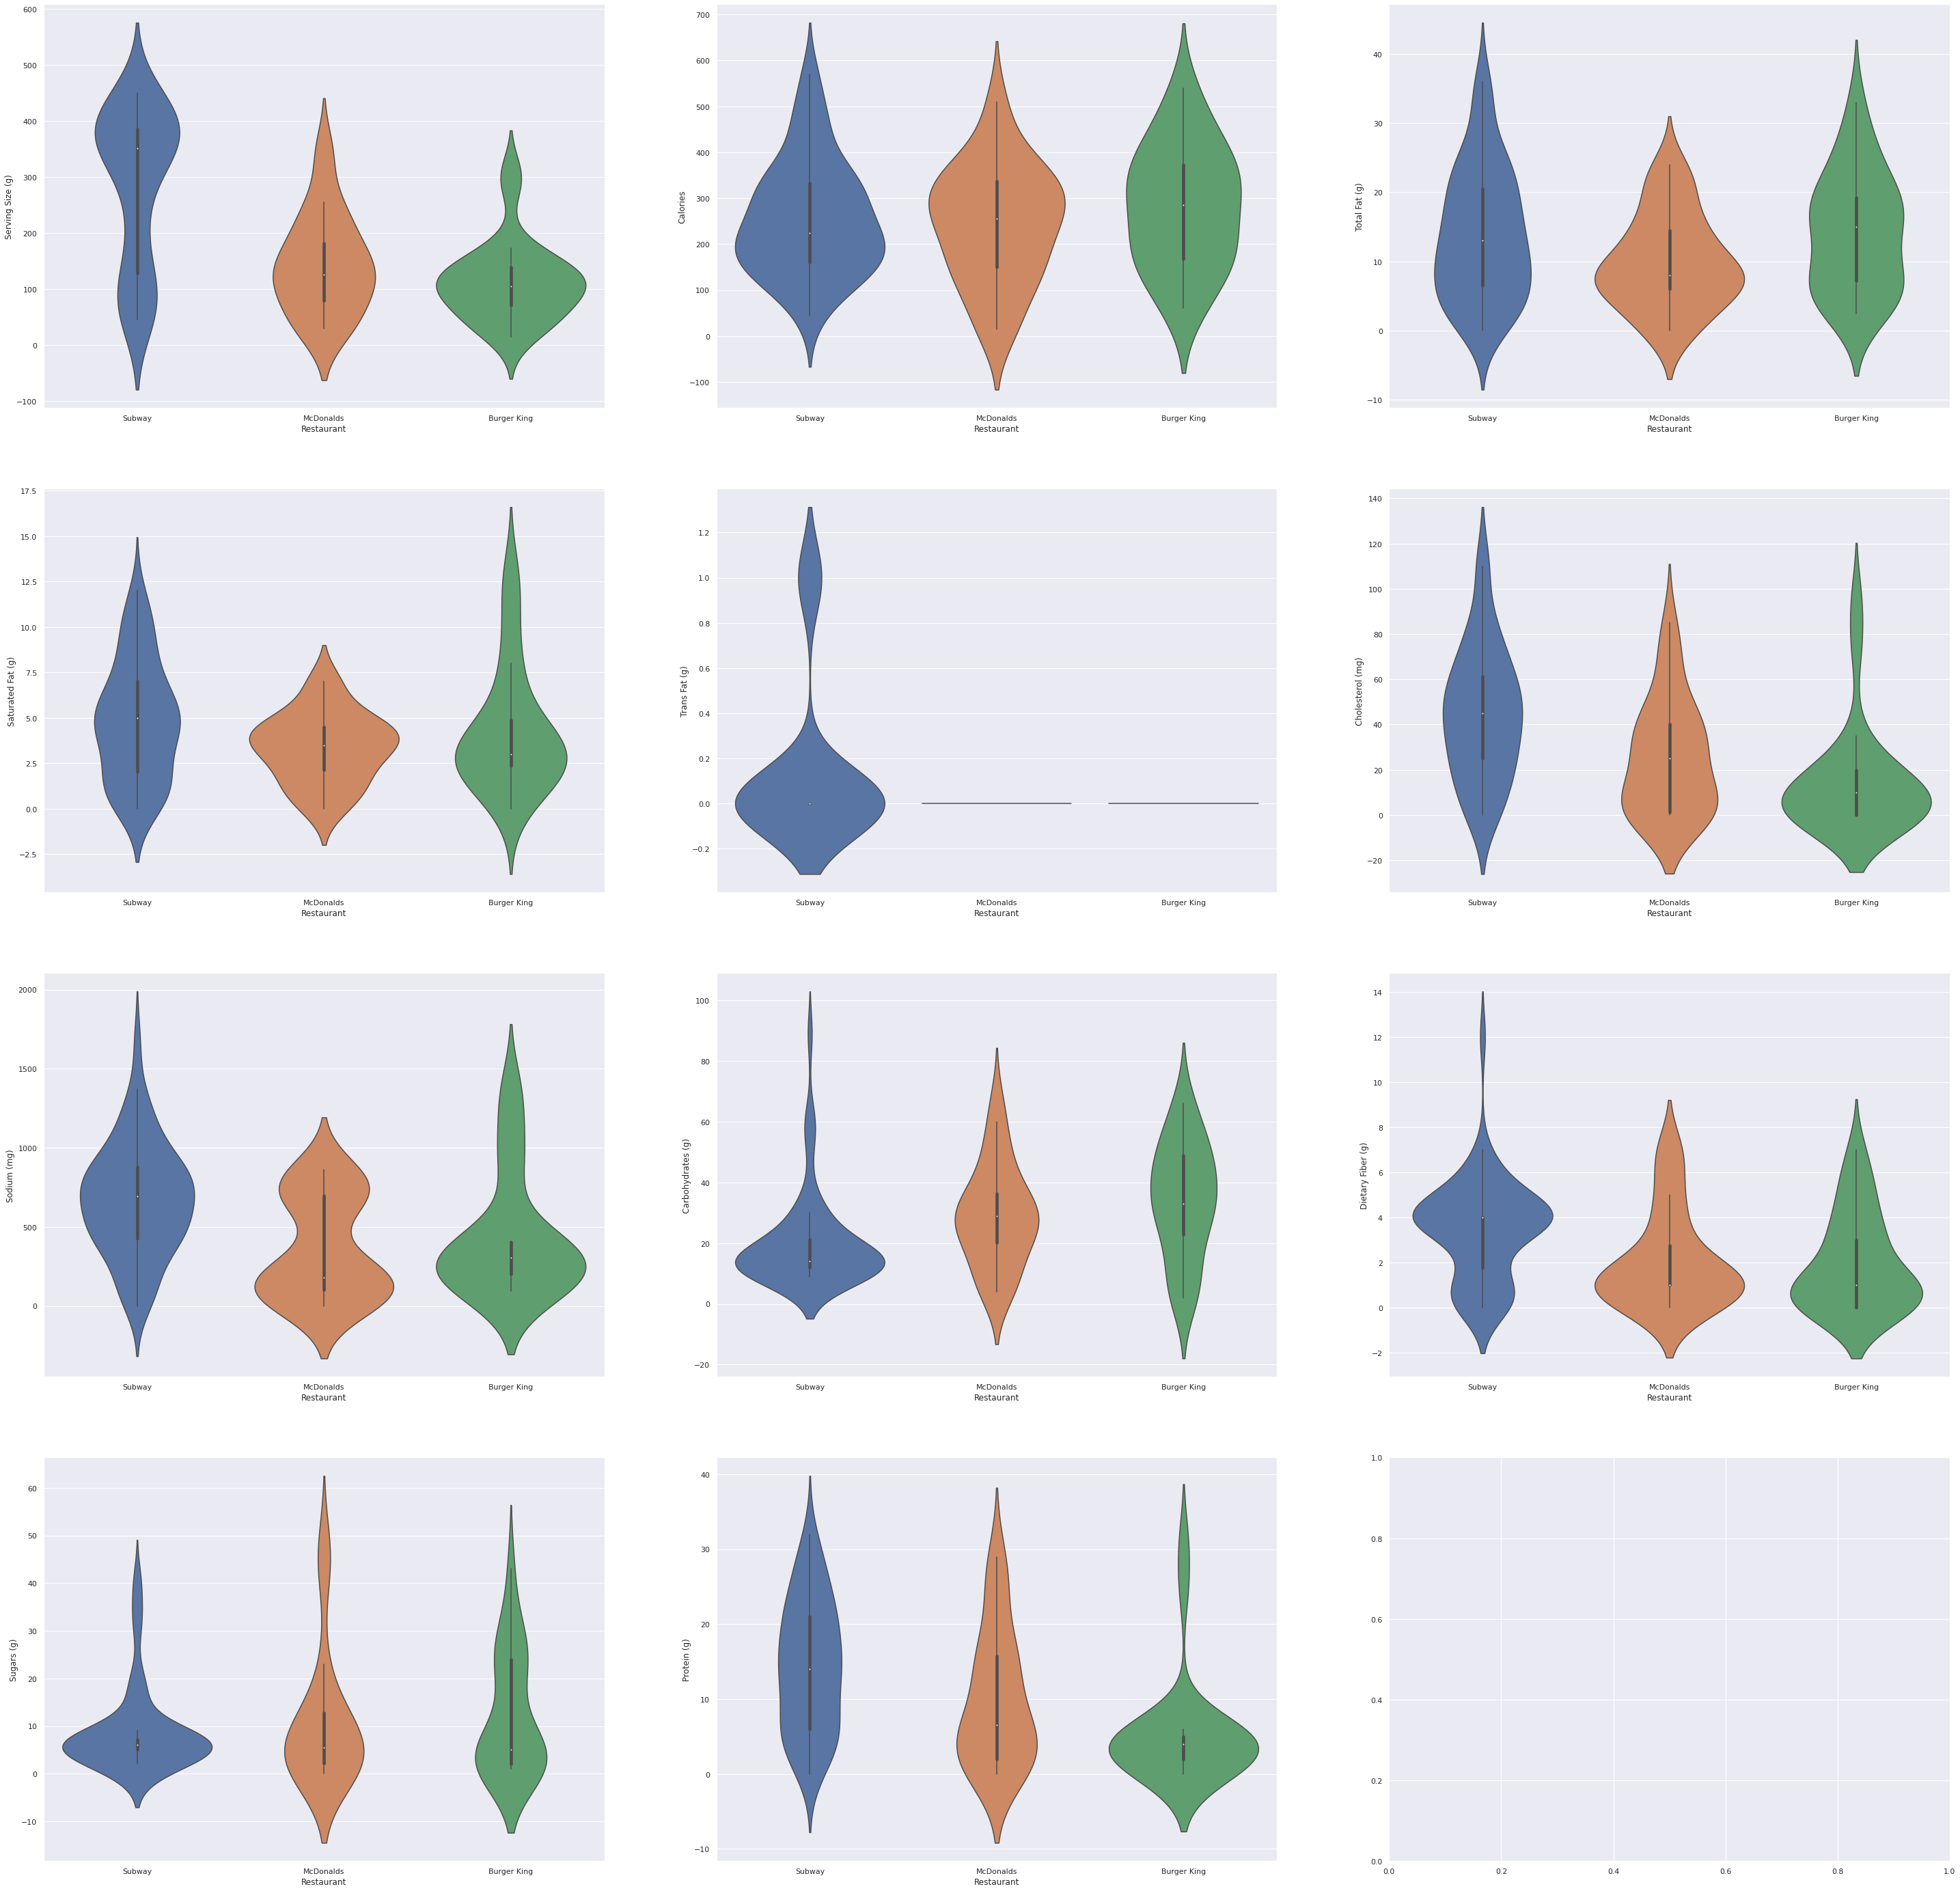

In [39]:
# Draw the distributions of all variables
f, axes = plt.subplots(4,3, figsize=(50, 50))
variables = ['Serving Size (g)', 'Calories', 'Total Fat (g)',
       'Saturated Fat (g)', 'Trans Fat (g)', 'Cholesterol (mg)', 'Sodium (mg)',
       'Carbohydrates (g)', 'Dietary Fiber (g)', 'Sugars (g)', 'Protein (g)']
hori = 0 
vert = 0
for var in variables:
    sb.violinplot(x = "Restaurant", y = var, data = sides, ax = axes[vert,hori])
    hori += 1
    if (hori)%3 == 0:
        vert += 1
        hori = 0

We can make several general observations using these violin plots:
* McDonalds' data tends to be the most clustered, and it has the lowest mean value for several metrics. However, it has several outliers that have some of the highest sugar content. 
* Subway has two distinct clusters of serving size. This could mean two distinct types of sides, perhaps cookies versus soups. It has items that rank very highly in most metrics, While all items in McDonald's and Burger King have no trans fat, Subway has a few items with trans fat.
* Burger King's data range lies in the middle (in terms of range and IQR) for most metrics, except saturated fat, where it has more items with higher fat content than the other restaurants.

Upon this initial analysis, it appears Subway has the most unhealthy sides, followed by Burger King then McDonalds,

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


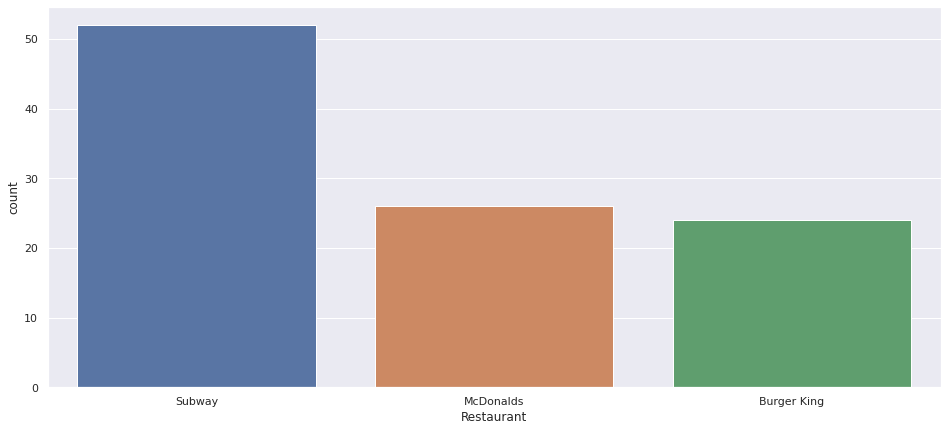

In [40]:
plt.figure(figsize=(16, 7))
sb.countplot(sides["Restaurant"])
plt.show()

In [41]:
print("Total: "+str(sides["Item"].count()))
print("Subway has " + str(sum(sides['Restaurant'] == 'Subway')) + " sides.")
print("McDonalds has " + str(sum(sides['Restaurant'] == 'McDonalds')) + " sides.")
print("Burger King has " + str(sum(sides['Restaurant'] == 'Burger King')) + " sides.")

Total: 102
Subway has 52 sides.
McDonalds has 26 sides.
Burger King has 24 sides.


### Comparing Unhealthy Sides

In [42]:
#find unhealthy sides that have failed any of the nutritional recommendations
unhealthysides = sides.loc[(sides["Saturated Fat (g)"] > 13/3)|(sides["Trans Fat (g)"] >= 2/3)|(sides["Cholesterol (mg)"] > 300/3)|(sides["Sodium (mg)"] > 2300/3)|(sides["Sugars (g)"] > 24/3)]
unhealthysides["Item"].count()

63

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


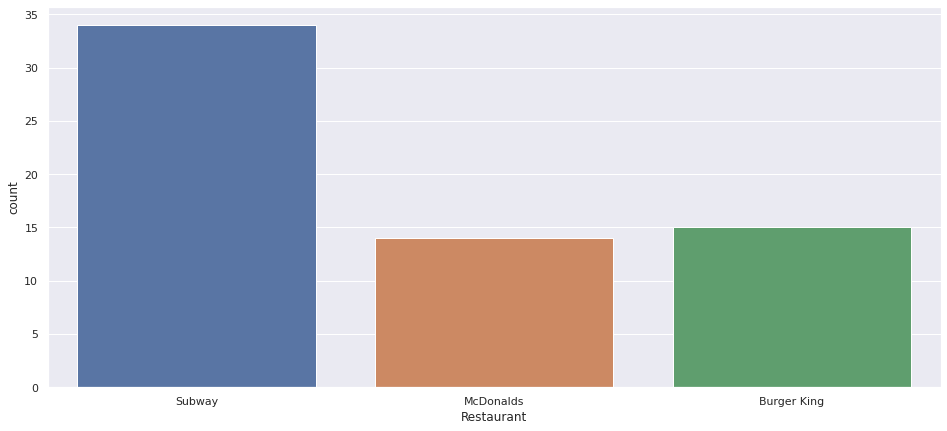

In [43]:
plt.figure(figsize=(16, 7))
sb.countplot(unhealthysides["Restaurant"])
plt.show()

### Comparing Healthy Sides

In [44]:
#find healthy sides that have failed none of the nutritional recommendations
healthysides = sides.loc[(sides["Saturated Fat (g)"] <= 13/3)&(sides["Trans Fat (g)"] < 2/3)&(sides["Cholesterol (mg)"] <= 300/3)&(sides["Sodium (mg)"] <= 2300/3)&(sides["Sugars (g)"] <= 24/3)]
healthysides["Item"].count()

39

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


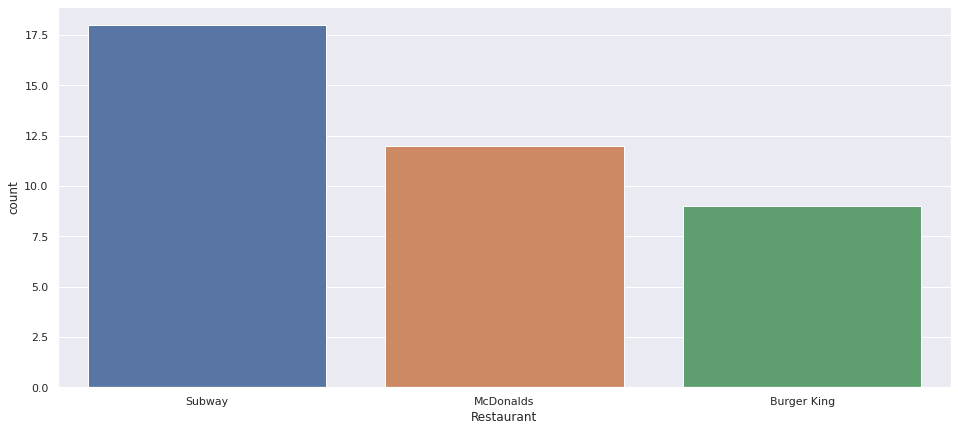

In [45]:
plt.figure(figsize=(16, 7))
sb.countplot(healthysides["Restaurant"])
plt.show()

In [46]:
print("% Healthy Sides:")
print("Subway: ", round(sum(healthysides['Restaurant']=="Subway")/sum(sides['Restaurant']=="Subway"),2)*100)
print("McDonalds: ", round(sum(healthysides['Restaurant']=="McDonalds")/sum(sides['Restaurant']=="McDonalds"),3)*100)
print("Burger King: ", round(sum(healthysides['Restaurant']=="Burger King")/sum(sides['Restaurant']=="Burger King"),3)*100)

% Healthy Sides:
Subway:  35.0
McDonalds:  46.2
Burger King:  37.5


In [47]:
healthysides[["Item","Restaurant"]]

Item   Restaurant
88                                    Black Forest Ham       Subway
92                                      Cold Cut Combo       Subway
95                                 Oven Roasted Turkey       Subway
96                                          Roast Beef       Subway
97                            Rotisserie-Style Chicken       Subway
99                                      Steak & Cheese       Subway
100                           Subway Club® (no olives)       Subway
102                                               Tuna       Subway
103                                     Veggie Delite®       Subway
113                                    Grilled Chicken       Subway
114                               Oven Roasted Chicken       Subway
115                          Oven Roasted Turkey & Ham       Subway
119                                       Veggie Patty       Subway
170          Ham & Jack (includes Pepperjack Cheese)**       Subway
172  Little Cheesesteak (includes American Cheese a...       Subway
173  Turkey (includes Pepperjack Cheese and Mayonna...       Subway
178                                         Applesauce       Subway
181                                        Hash Browns       Subway
272        Premium Bacon Ranch Salad (without Chicken)    McDonalds
274     Premium Bacon Ranch Salad with Grilled Chicken    McDonalds
275          Premium Southwest Salad (without Chicken)    McDonalds
279          Chipotle BBQ Snack Wrap (Grilled Chicken)    McDonalds
281         Honey Mustard Snack Wrap (Grilled Chicken)    McDonalds
284                                 Small French Fries    McDonalds
285                                Medium French Fries    McDonalds
286                                 Large French Fries    McDonalds
287                                  Kids French Fries    McDonalds
288                                         Side Salad    McDonalds
289                                       Apple Slices    McDonalds
294                                Kids Ice Cream Cone    McDonalds
340                   Garden Side Salad - w/o dressing  Burger King
341                               Ken's Ranch Dressing  Burger King
342                      Ken's Golden Italian Dressing  Burger King
344                    Buttery Garlic Croutons- Packet  Burger King
345                                Onion Rings - value  Burger King
349                    French Fries - value (unsalted)  Burger King
350                   French Fries - small  (unsalted)  Burger King
351                   French Fries - medium (unsalted)  Burger King
352                    French Fries - large (unsalted)  Burger King

Subway has the most number of healthy sides and unhealthy sides. However, it does have the most sides. Looking at the % calculations, Subway actually has the lowest proportion of healthy sides, followed by Burger King, and McDonald's has the highest % of healthy sides. This supports our initial violin plot analysis.

## 4. Overall

#### 1. Healthy Food Across Restaurants

In [48]:
data= {'McDonalds': [sum(merged_data["Restaurant"]=="McDonalds"), sum((merged_data["Restaurant"]=="McDonalds")&(merged_data["Unhealthy index"]==0)), round(sum((merged_data["Restaurant"]=="McDonalds")&(merged_data["Unhealthy index"]==0))/sum(merged_data["Restaurant"]=="McDonalds"),2)],
'Subway': [sum(merged_data["Restaurant"]=="Subway"), sum((merged_data["Restaurant"]=="Subway")&(merged_data["Unhealthy index"]==0)), round(sum((merged_data["Restaurant"]=="Subway")&(merged_data["Unhealthy index"]==0))/sum(merged_data["Restaurant"]=="Subway"),2)],
'Burger King': [sum(merged_data["Restaurant"]=="Burger King"), sum((merged_data["Restaurant"]=="Burger King")&(merged_data["Unhealthy index"]==0)), round(sum((merged_data["Restaurant"]=="Burger King")&(merged_data["Unhealthy index"]==0))/sum(merged_data["Restaurant"]=="Burger King"),2)]}
df = pd.DataFrame(data=data, index=['No. Items','No. Healthy','% Healthy'])
df

McDonalds  Subway  Burger King
No. Items       109.00  189.00        91.00
No. Healthy      17.00   32.00        20.00
% Healthy         0.16    0.17         0.22

#### 2. Healthy Food Across Meal Types

In [49]:
data= {'Breakfast': [sum(merged_data["Meal Type"]=="Breakfast"), sum((merged_data["Meal Type"]=="Breakfast")&(merged_data["Unhealthy index"]==0)), round(sum((merged_data["Meal Type"]=="Breakfast")&(merged_data["Unhealthy index"]==0))/sum(merged_data["Meal Type"]=="Breakfast"),2)],
'Mains': [sum(merged_data["Meal Type"]=="Mains"), sum((merged_data["Meal Type"]=="Mains")&(merged_data["Unhealthy index"]==0)), round(sum((merged_data["Meal Type"]=="Mains")&(merged_data["Unhealthy index"]==0))/sum(merged_data["Meal Type"]=="Mains"),2)],
'Sides': [sum(merged_data["Meal Type"]=="Sides"), sum((merged_data["Meal Type"]=="Sides")&(merged_data["Unhealthy index"]==0)), round(sum((merged_data["Meal Type"]=="Sides")&(merged_data["Unhealthy index"]==0))/sum(merged_data["Meal Type"]=="Sides"),2)]}
df = pd.DataFrame(data=data, index=['No. Items','No. Healthy','% Healthy'])
df

Breakfast   Mains   Sides
No. Items        72.00  215.00  102.00
No. Healthy       3.00   27.00   39.00
% Healthy         0.04    0.13    0.38

#### 3. Healthy Food Distribution - Breakfast

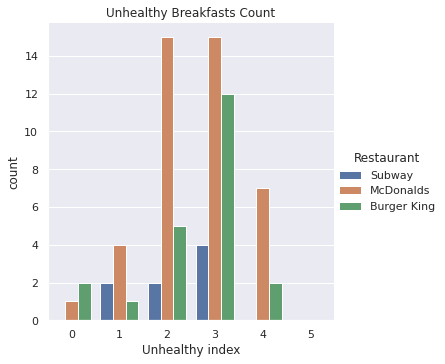

In [50]:
sb.catplot(data=Breakfasts, x="Unhealthy index", hue="Restaurant", kind="count").set(title='Unhealthy Breakfasts Count')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

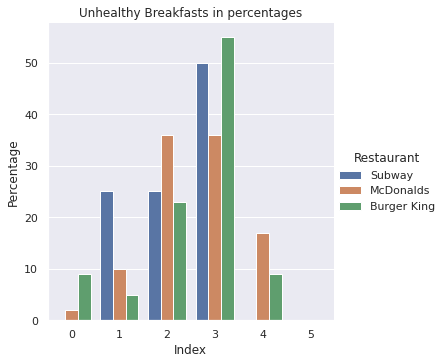

In [51]:
BfDistribution = (Breakfasts.groupby(['Restaurant','Unhealthy index'])['Unhealthy index'].count())*(100)/Breakfasts.groupby(['Restaurant'])['Unhealthy index'].count()
BfDistribution = BfDistribution.to_frame()

bkbf = BfDistribution.iloc[:6]
mcbf = BfDistribution.iloc[6:12]
sbbf = BfDistribution.iloc[12:]
index = [0,1,2,3,4,5]
sbbf['Restaurant'] = 'Subway'
sbbf["Index"] = index
mcbf['Restaurant'] = 'McDonalds'
mcbf["Index"] = index
bkbf['Restaurant'] = 'Burger King'
bkbf["Index"] = index
merge1 = pd.concat([sbbf, mcbf])
merged_bf = pd.concat([merge1, bkbf])
merged_bf['Unhealthy index']= merged_bf['Unhealthy index'].round(0)
merged_bf=merged_bf.rename(columns={"Unhealthy index": "Percentage"})
sb.catplot(data=merged_bf, x="Index", y = "Percentage", hue="Restaurant",kind="bar").set(title='Unhealthy Breakfasts in percentages')

Most of the breakfasts are unhealthy at 2 and 3 with the significant number of McDonalds breakfast at a 4.

#### 4. Healthy Food Distribution - Mains

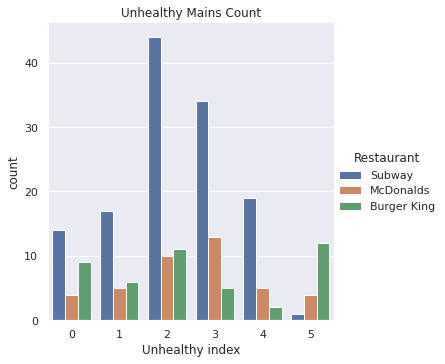

In [52]:
sb.catplot(data=mains, x="Unhealthy index", hue="Restaurant", kind="count").set(title='Unhealthy Mains Count')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

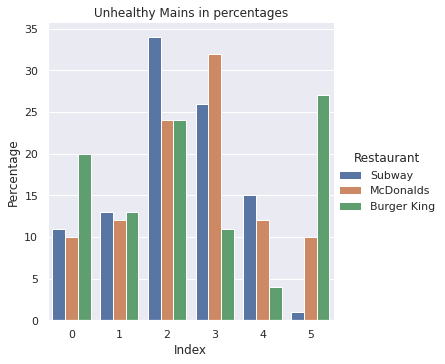

In [53]:
mainsDistribution = (mains.groupby(['Restaurant','Unhealthy index'])['Unhealthy index'].count())*(100)/mains.groupby(['Restaurant'])['Unhealthy index'].count()
mainsDistribution = mainsDistribution.to_frame()

bkmains = mainsDistribution.iloc[:6]
mcmains = mainsDistribution.iloc[6:12]
sbmains = mainsDistribution.iloc[12:]
index = [0,1,2,3,4,5]
sbmains['Restaurant'] = 'Subway'
sbmains["Index"] = index
mcmains['Restaurant'] = 'McDonalds'
mcmains["Index"] = index
bkmains['Restaurant'] = 'Burger King'
bkmains["Index"] = index
merge1 = pd.concat([sbmains, mcmains])
merged_mains = pd.concat([merge1, bkmains])
merged_mains['Unhealthy index']= merged_mains['Unhealthy index'].round(0)
merged_mains=merged_mains.rename(columns={"Unhealthy index": "Percentage"})
sb.catplot(data=merged_mains, x="Index", y = "Percentage", hue="Restaurant",kind="bar").set(title='Unhealthy Mains in percentages')

Most of the mains are generally around the 2 or 3 in this index. However Burger King a significant number of its mains being unhealthy at 5 on the index (exceeding all the nutritional recommendations). It has the most even spread of items with different levels of healthiness (as seen in the % plot above). In terms of number of violations, Subway items most commonly violate 2 metrics. This value is 3 for McDonald's and 5 for Burger King. In that way, you could consider subway to be the healthiest fast food restaurant to get mains.

#### 5. Healthy Food Distribution - Sides

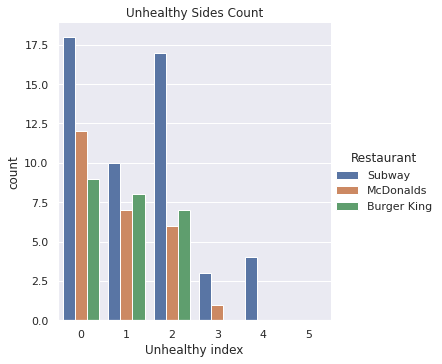

In [54]:
sb.catplot(data=sides, x="Unhealthy index", hue="Restaurant", kind="count").set(title='Unhealthy Sides Count')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

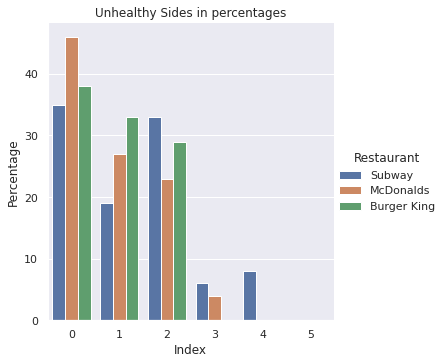

In [55]:
sidesDistribution = (sides.groupby(['Restaurant','Unhealthy index'])['Unhealthy index'].count())*(100)/sides.groupby(['Restaurant'])['Unhealthy index'].count()
sidesDistribution = sidesDistribution.to_frame()

bksides = sidesDistribution.iloc[:6]
mcsides = sidesDistribution.iloc[6:12]
sbsides = sidesDistribution.iloc[12:]
index = [0,1,2,3,4,5]
sbsides['Restaurant'] = 'Subway'
sbsides["Index"] = index
mcsides['Restaurant'] = 'McDonalds'
mcsides["Index"] = index
bksides['Restaurant'] = 'Burger King'
bksides["Index"] = index
merge1 = pd.concat([sbsides, mcsides])
merged_sides = pd.concat([merge1, bksides])
merged_sides['Unhealthy index']= merged_sides['Unhealthy index'].round(0)
merged_sides=merged_sides.rename(columns={"Unhealthy index": "Percentage"})
sb.catplot(data=merged_sides, x="Index", y = "Percentage", hue="Restaurant",kind="bar").set(title='Unhealthy Sides in percentages')

A larger proportion of total sides are healthy (as compared to mains/ breakfasts). This is likely because sides are not intended to be an entire meal. Most of the items here are things like desserts, snacks or soups.

#### 6. Final Insights

* Items that have one "unhealthy" trait (e.g. high in cholesterol) tend to have multiple unhealthy traits. However, items with a "healthy" trait (e.g. high in fibre) may not have a lack of "unhealthy" traits either. In fact, via our unhealthy index, it appears most foods are overall unhealthy. It is also common for items to have multiple unhealthy traits, supporting our earlier pair plot/heatmap observations.

To find out which variable is the most important in predicting how unhealthy an item is based on the "Unhealthy Index", we will use a Multi-Class Classification Tree.

* The "healthiest" things at fast food restaurants are their sides, followed by mains then breakfasts.  
* The fast food restaurant with the highest proportion of healthy food is Burger King, followed by Subway then McDonald's. However, in terms of numbers, there are more healthy mains and sides options at Subway than the other two joints.
* Hence, someone trying to maintain a healthy diet on fast food should go to Subway for mains/ sides to have a greater number of options. However, they would have a higher chance of selecting a healthy item if they went to Burger King (and it's likely to be a side).

This EDA touched briefly on relativistic comparisons of health, but focused more on using an external metric to measure health across different meal types and restaurants. We look at healthy food from the perspective of food in general. We will explore a more relativistic approach (health in the context of fast food) through our machine learning analysis, using K-Means.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3cd1c4af-daef-4005-958a-27a380c5f533' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>